<a href="https://colab.research.google.com/github/gabrielsimas/clima-rj-analise/blob/master/MVP_AlertaRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# ***MVP de Análise de Dados e Boas Práticas - AlertaRio e a Crise Climática, uma abordagem prática através Ciência de Dados***

![Logo AlertaRio](https://www.sistema-alerta-rio.com.br/wp-content/uploads/2025/01/GeoRio__Alerta_branco_3.png)

</center>

### ***Nome:*** **Luís Gabriel Nascimento Simas**

### ***Matrícula:*** **4052025000943**

# **Observação metodológica:**  
## *Apesar de utilizar a ***checklist sugerida*** como referência, este projeto apresenta uma complexidade que extrapola os problemas clássicos de aprendizado supervisionado/não supervisionado. A análise dos dados do AlertaRio envolve questões de múltiplas naturezas (séries temporais, impactos climáticos, variáveis ambientais diversas) e, portanto, a estrutura adotada neste relatório foi adaptada para refletir as premissas e hipóteses levantadas aqui. Todas as etapas sugeridas na checklist são contempladas e contextualizadas dentro das seções apropriadas deste trabalho.*

---

# **1. Definição do Problema**

## **Descrição do Problema**

### O **Aquecimento Global** é uma realidade reconhecida desde o final dos anos 1960. O debate sobre sua origem — se cíclica, natural, ou resultado da ação humana — ainda é intenso, mas os efeitos práticos já são sentidos no clima brasileiro e, especialmente, no Rio de Janeiro.  
### Eventos como El Niño e La Niña, que refletem o aquecimento e resfriamento do Pacífico, influenciam nosso macroclima e impactam diretamente o microclima carioca. Isso resulta em extremos de chuva, ondas de calor e frio, ventos intensos, secas e amplitudes térmicas elevadas, afetando tanto a infraestrutura urbana quanto a saúde da população — especialmente crianças e idosos, mais vulneráveis a essas mudanças.
### Entender as transformações climáticas não é apenas um debate acadêmico ou político, mas uma necessidade concreta para a adaptação e resiliência da cidade. Este projeto não pretende esgotar o tema, mas sim oferecer um retrato detalhado, fundamentado em dados do AlertaRio, sobre como o clima do Rio de Janeiro tem mudado nas últimas décadas. O objetivo é instrumentalizar gestores públicos e sociedade para a adoção de políticas mais eficazes, principalmente nas áreas mais vulneráveis, a partir de uma leitura precisa dos dados pluviométricos e meteorológicos coletados.

### Neste projeto, partimos das seguintes premissas e hipóteses, baseadas em literatura científica e no consenso da climatologia:

- ### **Premissa 1:** Eventos de **El Niño** estão associados ao aumento das temperaturas médias e à ocorrência de ondas de calor na cidade do Rio de Janeiro.
- ### **Premissa 2:** Eventos de **La Niña** tendem a favorecer a diminuição das temperaturas médias e o aumento de episódios de frio na região.
- ### **Premissa 3:** Os efeitos dos fenômenos ENSO (El Niño e La Niña) podem influenciar não apenas a temperatura, mas também o regime de chuvas e a frequência de eventos extremos.

### **Hipótese central:**
- ### Durante os anos classificados como El Niño, a média das temperaturas será significativamente maior do que nos anos neutros ou de La Niña.
- ### Durante os anos classificados como La Niña, espera-se uma média de temperaturas inferior à observada em anos neutros ou de El Niño.

### Essas premissas e hipóteses nortearão a análise exploratória dos dados históricos de clima no Rio de Janeiro entre 1997 e 2024, possibilitando testar a validade dessas relações estatisticamente.

## **O que é o AlertaRio e quais dados são monitorados?**

### O Sistema AlertaRio opera com 33 estações de monitoramento pluviométrico de última geração divididas em todas as Zonas Urbanas da Cidade, realizando medições em múltiplos intervalos (5 min, 10 min, 15 min, 1h, 4h, 24h, 96h e acumulados mensais), são elas, em ordem de inauguração: **Vidigal**, **Urca**, **Rocinha**, **Tijuca**, **Santa Teresa**, **Copacabana**, **Grajaú**, **Ilha do Governador**, **Penha**, **Madureira**, **Irajá**, **Bangu**, **Piedade**, **Jacarepaguá/Tanque**, **Saúde**, **Jardim Botânico**, **Barra/Barrinha**, **Jacarepaguá/Cidade de Deus**, **Barra/Riocentro**, **Guaratiba**, **Est. Grajaú/Jacarepaguá**, **Santa Cruz**, **Grande Méier**, **Anchieta**, **Grota Funda**, **Campo Grande**, **Sepetiba**, **Alto da Boa Vista**, **Av. Brasil/Mendanha**, **Recreio dos Bandeirantes**, **Laranjeiras**, **São Cristóvão**, **Tijuca/Muda**.
### Oito destas estações também monitoram variáveis meteorológicas adicionais (vento, temperatura, pressão, umidade): **Vidigal**, **Irajá**, **Jardim Botânico**, **Barra/RioCentro**, **Guaratiba**, **Santa Cruz**, **Alto da Boa Vista** e **São Cristóvão**. Essas estações coletam dados como direção e velocidade do vento, temperatura, pressão atmosférica e umidade relativa, a cada 15 minutos. Algumas operam desde janeiro de 1997.

---

# **2. Aquisição e preparação dos dados**

### Neste projeto, vamos criar o nosso conjunto de dados baseado nos arquivos brutos extraídos das estações meteorológicas e pluviométricas do AlertaRio e extrair dados do NOAA sobre o Fenômeno Niño (El Niño e La Niña) ou ENOS - El Niño/La Niña Oscilação Sul.
### Nessa seção, vamos coletar os arquivos das estações, converter em dataframes, descartar as variáveis desnecessárias e criar nosso dataset inicial com dados brutos em formato parquet.
### **OBS**: Sempre que surgir a sigla **ENOS**, significa que estamos falando do Fenômeno El Niño/La Niña em nosso hemisfério Sul.


## **2.1. Aquisição**
### Coletamos os dados brutos de dois locais distintos - AlertaRio e NOAA - para extrair as variáveis para nosso dataset na etapa de Análises de Dados.
### A aquisição foi feita para os dados meteorológicos e Pluviométricos diretamente do site do alerta rio via download manual e adicionado no diretório `alertario/`

- **Meteorológico**: https://websempre.rio.rj.gov.br/dados/pluviometricos/met/
- **Pluviométrico**: https://websempre.rio.rj.gov.br/dados/pluviometricos/met/

- **El Niño/La Niña**: https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

### Para referências sobre como categorizamos os índices pluviométricos e meterológicos, utilizamos como referência as informações presentes no próprio [site do AlertaRio](https://www.sistema-alerta-rio.com.br/previsao-do-tempo/termosmet/).

### Baixando o repositório do github

In [633]:
!git clone https://github.com/gabrielsimas/clima-rj-analise.git

fatal: destination path 'clima-rj-analise' already exists and is not an empty directory.


### **Instalando os pacotes para o projeto**

### **Importando os pacotes do Projeto**

In [634]:
import logging
import os
import pandas as pd
from IPython.display import Image, display
import zipfile
import io
from io import TextIOWrapper
import numpy as np
from numpy import ndarray
from typing import List, Tuple, IO
import re
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import nest_asyncio
import asyncio
nest_asyncio.apply()
import missingno as msno
from datetime import datetime
from datetime import time

### **Funções Auxiliares**
### **Aqui estão todas as funções utilizadas no Projeto**

In [635]:
# Resetar os handlers existentes no colab
for handler in logging.root.handlers[:]:
  logging.root.removeHandler(handler)

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s"
)

logger = logging.getLogger()

In [636]:
# ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO -= Apaga o conteúdo de um diretório =- ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO ATENÇÃO
# import shutil
# diretorio = Path("/content/clima-rj-analise")
# for item in diretorio.iterdir():
#  if item.is_file() or item.is_symlink():
#    item.unlink()
#  elif item.is_dir():
#    shutil.rmtree(item)

In [637]:
def inferir_colspecs_e_nomes_fwf_txt(
    txt_file_content: IO[str],
    linha_header: int = 4,
    linha_dados: int = 5,
    n_linhas_amostra: int = 50,
    encoding: str = "latin1",
    debug: bool = False
):
  """
  Lê um arquivo .txt, pula as linhas de cabeçalho, infere colspecs e nomes.
    Retorna:
      - colspecs: lista de (start, end)
      - nomes: lista de nomes das colunas, extraídos da linha de cabeçalho
  """
  linhas = []
    # Pula até a linha do header
  for _ in range(linha_header):
    next(txt_file_content, None)
  header_line = next(txt_file_content).rstrip("\n")
  # Pula linhas até a linha de dados
  for _ in range(linha_dados - linha_header - 1):
    next(txt_file_content, None)
  # Lê amostra de linhas de dados
  for _ in range(n_linhas_amostra):
    linha = txt_file_content.readline()
    if not linha:
      break
    linhas.append(linha.rstrip("\n"))

  if not linhas:
    raise ValueError("Nenhuma linha encontrada para inferência")

  largura_max = max(len(l) for l in linhas + [header_line])
  todas = [header_line] + linhas
  matriz = np.zeros((len(todas), largura_max), dtype=bool)

  for i, l in enumerate(todas):
    texto = l.ljust(largura_max)
    matriz[i, :] = [(ch != " ") for ch in texto]

  col_nao_vazia = matriz.any(axis=0)
  colspecs = []
  em_bloco = False
  conta_espacos = 0
  for idx, tem_valor in enumerate(col_nao_vazia):
    if tem_valor:
      if not em_bloco:
        inicio = idx
        em_bloco = True
      conta_espacos = 0
    else:
      if em_bloco:
        conta_espacos += 1
        if conta_espacos >= 2:
          fim = idx - (conta_espacos - 1)
          colspecs.append((inicio, fim))
          em_bloco = False
          conta_espacos = 0
  if em_bloco:
    colspecs.append((inicio, largura_max))

  nomes = [header_line[start:end].strip() for start, end in colspecs]
  if debug:
    print("Header => ", repr(header_line))
    print("Colspecs => ", colspecs)
    print("Nomes => ", nomes)
  return colspecs, nomes

In [638]:
def convert_arquivo_txt_para_dataframe(
    zip_path: str,
    nome_arquivo_txt: str
    ) -> pd.DataFrame:
  """
  Lê um arquivo .txt, de dentro de um arquivo .zip, e converte para um dataframe.
    Retorna:
      - dataframe: dataframe com os dados do arquivo .txt
  """
  with zipfile.ZipFile(zip_path, "r") as zip_ref:
    try:
      match_arquivo_nome = re.match(r'(.+?)_(\d{6})_(Plv|Met)\.txt$', nome_arquivo, re.IGNORECASE)
      estacao = match_arquivo_nome.group(1).lower()
      ano = int(match_arquivo_nome.group(2)[:4])
      mes = int(match_arquivo_nome.group(2) [4:6])
      tipo = match_arquivo_nome.group(3).lower()
      with zip_ref.open(nome_arquivo) as f:
        conteudo_arquivo = f.read().decode('utf-8')
        if tipo == "plv":
          colspecs, nomes = inferir_colspecs_e_nomes_fwf_txt(io.StringIO(conteudo_arquivo),linha_header=4,linha_dados=5,n_linhas_amostra=100)
          return pd.read_fwf(io.StringIO(conteudo_arquivo), colspecs=colspecs, names=nomes, skiprows=5, dtype=str, encoding="latin1")
        elif tipo == "met":
          colspecs, nomes = inferir_colspecs_e_nomes_fwf_txt(io.StringIO(conteudo_arquivo),linha_header=4,linha_dados=6,n_linhas_amostra=100)
          return pd.read_fwf(io.StringIO(conteudo_arquivo), colspecs=colspecs, names=nomes, skiprows=5, dtype=str, encoding="latin1")
    except FileNotFoundError:
      print(f"Arquivo zip {zip_path} não encontrado")

In [639]:
def le_arquivo_sem_dados(zip_path: str, nome_arquivo_txt: str) -> pd.DataFrame:
  """
  Lê um arquivo .txt, de dentro de um arquivo .zip, e converte para um dataframe
  """
  with zipfile.ZipFile(zip_path, "r") as zip_ref:
    try:
      match_arquivo_nome = re.match(r'(.+?)_(\d{6})_(Plv|Met)\.txt$', nome_arquivo, re.IGNORECASE)
      estacao = match_arquivo_nome.group(1).lower()
      ano = int(match_arquivo_nome.group(2)[:4])
      mes = int(match_arquivo_nome.group(2) [4:6])
      tipo = match_arquivo_nome.group(3).lower()
      with zip_ref.open(nome_arquivo) as f:
        conteudo_arquivo = f.read().decode('utf-8')
        df = pd.read_fwf(io.StringIO(conteudo_arquivo), skiprows=4, dtype=str, encoding="latin1")
        if tipo == "met":
          df = df.drop(index=0)
          df = df.reset_index(drop=True)
        return df
    except FileNotFoundError:
      print(f"Arquivo zip {zip_path} não encontrado")

In [640]:
dados_estacoes = [
    {
    "nome": "alto_da_boa_vista",
    "nome_completo": "Alto da Boa Vista",
    "zona": "Norte"
    },
    {
    "nome": "anchieta",
    "nome_completo": "Anchieta",
    "zona": "Norte"
    },
    {
    "nome": "av_brasil_mendanha",
    "nome_completo": "Av. Brasil - Mendanha",
    "zona": "Oeste"
    },
    {
    "nome": "bangu",
    "nome_completo": "Bangu",
    "zona": "Oeste"
    },
    {
    "nome": "barrinha",
    "nome_completo": "Barrinha",
    "zona": "Oeste"
    },
    {
    "nome": "campo_grande",
    "nome_completo": "Campo Grande",
    "zona": "Oeste"
    },
    {
    "nome": "cidade_de_deus",
    "nome_completo": "Cidade de Deus",
    "zona": "Oeste"
    },
    {
    "nome": "copacabana",
    "nome_completo": "Copacabana",
    "zona": "Sul"
    },
    {
    "nome": "grajau",
    "nome_completo": "Grajaú",
    "zona": "Norte"
    },
    {
    "nome": "grajau_jacarepagua",
    "nome_completo": "Estrada Grajaú-Jacarepaguá",
    "zona": "Norte"
    },
    {
    "nome": "grande_meier",
    "nome_completo": "Grande Méier",
    "zona": "Norte"
    },
    {
    "nome": "grota_funda",
    "nome_completo": "Grota Funda",
    "zona": "Oeste"
    },
    {
    "nome": "guaratiba",
    "nome_completo": "Guaratiba",
    "zona": "Oeste"
    },
    {
    "nome": "ilha_do_governador",
    "nome_completo": "Ilha do Governador",
    "zona": "Norte"
    },
    {
    "nome": "iraja",
    "nome_completo": "Irajá",
    "zona": "Norte"
    },
    {
    "nome": "jardim_botanico",
    "nome_completo": "Jardim Botânico",
    "zona": "Sul"
    },
    {
    "nome": "laranjeiras",
    "nome_completo": "Laranjeiras",
    "zona": "Sul"
    },
    {
    "nome": "madureira",
    "nome_completo": "Madureira",
    "zona": "Norte"
    },
    {
    "nome": "penha",
    "nome_completo": "Penha",
    "zona": "Norte"
    },
    {
    "nome": "piedade",
    "nome_completo": "Piedade",
    "zona": "Norte"
    },
    {
    "nome": "recreio",
    "nome_completo": "Recreio",
    "zona": "Oeste"
    },
    {
    "nome": "riocentro",
    "nome_completo": "Riocentro",
    "zona": "Oeste"
    },
    {
    "nome": "rocinha",
    "nome_completo": "Favela da Rocinha",
    "zona": "Sul"
    },
    {
    "nome": "santa_cruz",
    "nome_completo": "Santa Cruz",
    "zona": "Oeste"
    },
    {
    "nome": "santa_teresa",
    "nome_completo": "Santa Teresa",
    "zona": "Centro"
    },
    {
    "nome": "sao_cristovao",
    "nome_completo": "São Cristovão",
    "zona": "Norte"
    },
    {
    "nome": "saude",
    "nome_completo": "Saúde",
    "zona": "Centro"
    },
    {
    "nome": "sepetiba",
    "nome_completo": "Sepetiba",
    "zona": "Oeste"
    },
    {
    "nome": "tanque",
    "nome_completo": "Tanque",
    "zona": "Oeste"
    },
    {
    "nome": "tijuca",
    "nome_completo": "Tijuca",
    "zona": "Norte"
    },
    {
    "nome": "tijuca_muda",
    "nome_completo": "Tijuca - Muda",
    "zona": "Norte"
    },
    {
    "nome": "urca",
    "nome_completo": "Urca",
    "zona": "Sul"
    },
    {
    "nome": "vidigal",
    "nome_completo": "Favela do Vidigal",
    "zona": "Sul"
    }
    ]

In [641]:
def obter_nome_estacao(nome: str) -> str:
  for item in dados_estacoes:
    if item["nome"] == nome:
      return item["nome_completo"]
  return nome

In [642]:
def formata_nome(nome: str) -> str:
  preposicoes = {"da", "de", "do", "dos", "das", "e"}
  palavras = nome.lower().split()
  return " ".join([
      p if p in preposicoes else p.capitalize()
      for i, p in enumerate(palavras)
  ])

In [643]:
import os
import csv

# Função complementares
def carregar_dataset_existente(caminho_csv: str, colunas_chave, conversores=None):
  """
  Lê um arquivo CSV e retorna um set de tuplas contendo os valores das colunas especificadas.

    Parâmetros:
    - caminho_csv (str): caminho do arquivo CSV.
    - colunas_chave (list[str]): nomes das colunas que formarão a chave.
    - conversores (dict[str, callable], opcional): funções para converter os valores de colunas específicas.

    Retorna:
    - set[tuple]: conjunto de tuplas com os valores das colunas chave.
  """
  registros = set()

  if os.path.exists(caminho_csv):
    with open(caminho_csv, "r", encoding="utf-8") as f:
      reader = csv.DictReader(f)
      for row in reader:
        chave = []
        for coluna in colunas_chave:
          valor = row[coluna]
          if conversores and coluna in conversores:
            valor = conversores[coluna](valor)
          chave.append(valor)
        registros.add(tuple(chave))
  return registros

In [644]:
async def processar_diretorio_com_arquivos_zip(
    diretorio_base: str,
    registros_existentes: None,
    callback_arquivo_valido=None,
    callback_erro=None
):
  """
  Percorre recursivamente os arquivos zip em um diretório e retorna uma lista de registros processados.

  Parâmetros:
  - diretorio_base (str): caminho base onde os arquivos serão procurados.
  - registros_existentes (set[tuple], opcional): chaves que já foram processadas para evitar duplicação.
  - callback_arquivo_valido (callable): função chamada quando um arquivo válido é encontrado.
  - callback_erro (callable): função chamada quando ocorre um erro no processamento de um zip.

  Retorna:
  - List[List]: lista de registros processados.
    """
  registros_novos = []
  registros_existentes = registros_existentes or set()
  arquivos_com_erro = ["sao_cristovao_201207_Met_2.txt","riocentro_201610_Met_1D7kCbB.txt"]
  for raiz,_, arquivos in os.walk(diretorio_base):
    for arquivo in arquivos:
      if arquivo.endswith(".zip"):
        caminho_zip = os.path.join(raiz, arquivo)
        nome_diretorio = Path(raiz).name

        try:
          with zipfile.ZipFile(caminho_zip, "r") as zip_ref:
            for info in zip_ref.infolist():
              nome_arquivo = info.filename
              tamanho = info.file_size
              chave = (arquivo, nome_arquivo, tamanho)
              arquivo_nome_match = re.match(r'(.+?)_(\d{6})_(Plv|Met).*\.txt$', nome_arquivo, re.IGNORECASE)
              estacao = formata_nome(arquivo_nome_match.group(1).lower())
              ano = int(arquivo_nome_match.group(2)[:4])
              mes = int(arquivo_nome_match.group(2) [4:6])
              estacao = formata_nome(arquivo_nome_match.group(1).lower())
              if chave not in registros_existentes:

                if callback_arquivo_valido:
                  registro = callback_arquivo_valido(
                      nome_diretorio, arquivo, nome_arquivo, tamanho
                      )
                else:
                  registro = [
                      nome_diretorio,
                      estacao,
                      ano,
                      mes,
                      arquivo,
                      nome_arquivo,
                      tamanho,
                      "SUCESSO",
                      "",
                      ""
                  ]

                registros_novos.append(registro)
        except Exception as e:
          if callback_erro:
            callback_erro(arquivo, str(e))
          else:
            registro = [
                nome_diretorio,
                estacao,
                ano,
                mes,
                arquivo,
                "",
                0,
                "ERRO",
                str(e),
                ""]
          registros_novos.append(registro)
          print(f"Erro ao processar o arquivo {nome_arquivo} => {e}")
          continue
        await asyncio.sleep(0) # liberar controle (async cooperativo)
  return registros_novos

In [645]:
import zipfile
import io
import csv
from pathlib import Path
# 1 - Extraindo os arquivos de dentro do zip
# 2 - Adicionando a linha dentro do novo dataset de controle de arquivos
# 2.1 - Será criado um atributo de nome do arquivo .txt para ficar dentro
# do "pack" para saber de qual arquivo .zip saiu
# 3 - Converte o arquivo de informações pluviométricas/Meteorológicas dentro
# do dataset específico
# 3.1 - Cria um dataset de processamento de cada arquivo com os seguintes
# dados: Nome do arquivo .txt, nome do arquivo.zip, início do processamento,
# término do processamento, status do processamento: SUCESSO ou ERRO
# caso tenhamos erro, a mensagem vai ser logada;
# 4. Os arquivos .txt serão apagados do diretório temporário que foi criado
# com o nome do arquivo .zip
async def processar_zip_para_csv(caminho_zip: str, dataset: str):
  registros_novos = []
  registros_existentes = set()

  registros_existentes = carregar_dataset_existente(
      dataset,
       ["Arquivo.zip", "Arquivo_extraido", "Tamanho_Bytes"],
       {"Tamanho_Bytes": int}
      )

  registros_novos = await processar_diretorio_com_arquivos_zip(
      caminho_zip,
      registros_existentes,
      callback_arquivo_valido=None,
      callback_erro=None
  )

  registros_novos_ordenados = sorted(
      registros_novos,
      key=lambda x: (x[1], x[2], x[3])
  )

  # Escreve no arquivo CSV
  if registros_novos:
    arquivo_existe = os.path.exists(dataset)
    with open(dataset, "a", newline="", encoding="utf-8") as f:
      writer = csv.writer(f)
      if not arquivo_existe:
        writer.writerow(["Diretorio", "Estacao","Ano","Mes","Arquivo.zip", "Arquivo_extraido", "Tamanho_Bytes", "Status", "Msg_Erro", "Processado"])
      writer.writerows(registros_novos_ordenados)

    return f"{len(registros_novos_ordenados)} registros adicionados em: {dataset}"
  else:
    return f"Nenhum novo registro adicionado em: {dataset}"

In [646]:
def gera_grafico_barras_economia(total_antes: int, total_depois: int, valor_invalido: int):
  total_antes = df_arquivos_estacoes_met.shape[0]
  total_depois = df_met_maior_300_bytes.shape[0]
  eliminados = total_antes - total_depois
  df_plot = pd.DataFrame({
      'Situação': ['Antes do filtro', 'Depois do filtro', 'Eliminados'],
      'Quantidade': [total_antes, total_depois, eliminados]
  })

  plt.figure(figsize=(7,5))
  ax = sns.barplot(
      x='Situação',
      y='Quantidade',
      hue='Situação',
      data=df_plot,
      palette='Blues_d',
      legend=False
  )

  for i, v in enumerate(df_plot['Quantidade']):
    ax.text(i, v + total_antes * 0.01, str(v), ha='center', fontsize=12, weight='bold')

  plt.title(f'Impacto do filtro de Arquivos (< {valor_invalido} bytes) - Meteorológicos')
  plt.ylabel('Quantidade de Arquivos')
  plt.ylim(0, total_antes + total_antes * 0.1)
  plt.xlabel('')
  plt.show()

In [647]:
def gera_grafico_de_barras_amostra_x_universo(met_universo,plv_universo,met_amostra,plv_amostra):
  valores = [met_universo, plv_universo, met_amostra, plv_amostra]
  nomes = [
      'Dados Meteorológicos - 8 estações',
      'Dados Pluviométricos - 33 estações',
      'Dados Meteorológicos - 6 estações selecionadas',
      'Dados Pluviométricos - 6 estações selecionadas',
  ]
  plt.figure(figsize=(16,5))
  barras = plt.bar(nomes, valores, color=['#1976d2', '#43a047', '#64b5f6', '#81c784'])

  for i, v in enumerate(valores):
    plt.text(i, v + max(valores)*0.01, f'{v:.2f}', ha="center", fontsize=12, fontweight='bold')

  plt.ylabel('Espaço ocupado (MB)')
  plt.title('Comparação de Espaço ocupado - Met e Plv')
  plt.tight_layout()
  plt.show()

In [648]:
def gera_grafico_enos(df: pd.DataFrame):
  df_periodo = df[(df['ano'] >= 1997) & (df['ano'] <= 2024)].copy()

  plt.figure(figsize=(16,5))
  sns.lineplot(data=df_periodo, x='ano', y='anomalia', label='ONI - Oceanic Niño Index')

  plt.axhline(0.5, color='red', linestyle='--', label='El Niño >= +0.5 °C')
  plt.axhline(-0.5, color='blue', linestyle='--', label='La Niña <= -0.5 °C')
  el_nino_picos = df_periodo[df_periodo['anomalia'] >= 0.5].sort_values('anomalia',ascending=False).head(5)
  la_nina_picos = df_periodo[df_periodo['anomalia'] <= -0.5].sort_values('anomalia').head(5)
  neutro = df_periodo[(df_periodo['anomalia'] > -0.5) & (df_periodo['anomalia'] < 0.5)]

  if not neutro.empty:
    neutro = neutro.loc[[neutro['anomalia'].abs().idxmin()]]

  plt.legend()
  plt.title('Oceanic Niño Index (ONI) – 1997-2024')
  plt.ylabel('Anomalia na Temp. da Superf. do Oceano (°C)')
  plt.xlabel('Ano')
  plt.tight_layout()
  plt.show()

In [649]:
def elimina_colunas_inuteis(df: pd.DataFrame, diretorio_zip: str, arquivo_estacoes: str, estacoes: List[str]) -> pd.DataFrame:
  if not os.path.exists(diretorio_zip):
    raise FileNotFoundError(f"Diretório {diretorio_zip} não encontrado")

  if not os.path.exists(arquivo_estacoes):
    raise FileNotFoundError(f"Arquivo {arquivo_estacoes} não encontrado")

  df_colunas_inuteis = df.copy()
  df_colunas_inuteis = df_colunas_inuteis[df_colunas_inuteis['Estacao'].isin(estacoes)]

  df_arquivos_estacoes = pd.read_csv(arquivo_estacoes)

  df_met = []
  df_plv = []

  for diretorio, nome_zip, nome_arquivo in zip(
      df_colunas_inuteis['Diretorio'],
      df_colunas_inuteis['Arquivo.zip'],
      df_colunas_inuteis['Arquivo_extraido']
  ):
    zip_path = os.path.join(diretorio_zip, diretorio, nome_zip)
    print(f"Processando zip {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      print(f"Processando arquivo {nome_arquivo}...")
      try:
        match_arquivo = re.match(r'(.+?)_(\d{6})_(Plv|Met).*\.txt$', nome_arquivo, re.IGNORECASE)
        estacao = obter_nome_estacao(match_arquivo.group(1).lower())
        ano = int(match_arquivo.group(2)[:4])
        mes = int(match_arquivo.group(2) [4:6])
        tipo = match_arquivo.group(3).lower()

        if nome_arquivo in zip_ref.namelist():
          condicao_ok = (
              (df_arquivos_estacoes['Arquivo.zip'] == nome_zip) &
              (df_arquivos_estacoes['Arquivo_extraido'] == nome_arquivo) &
              (df_arquivos_estacoes['Processado'] == "SIM")
          )

          condicao_atualiza = (
              (df_arquivos_estacoes['Arquivo.zip'] == nome_zip) &
              (df_arquivos_estacoes['Arquivo_extraido'] == nome_arquivo)
          )

          if condicao_ok.any():
            continue

          linha_existe = condicao_atualiza.any()

          colspecs = []
          nomes = []
          try:
            with zip_ref.open(nome_arquivo) as f:
              conteudo_arquivo = f.read().decode('utf-8')

              if tipo == "plv":
                colunas_para_excluir = ['HBV','15 min','01 h','04 h','96 h']
                colspecs, nomes = inferir_colspecs_e_nomes_fwf_txt(
                    io.StringIO(conteudo_arquivo),
                    linha_header=4,
                    linha_dados=5,
                    n_linhas_amostra=100
                    )
                df_plv_colunas_uteis = pd.read_fwf(io.StringIO(conteudo_arquivo), colspecs=colspecs, names=nomes, skiprows=5, encoding='latin1')
                if '05 min' in df_plv_colunas_uteis.columns:
                  df_plv_colunas_uteis = df_plv_colunas_uteis.drop(columns=['05 min'], axis=1)
                if '10 min' in df_plv_colunas_uteis.columns:
                  df_plv_colunas_uteis = df_plv_colunas_uteis.drop(columns=['10 min'], axis=1)
                df_plv_colunas_uteis = df_plv_colunas_uteis.drop(columns=colunas_para_excluir, axis=1)
                df_plv_colunas_uteis['Estacao'] = estacao
                df_plv.append(df_plv_colunas_uteis)
              if tipo == "met":
                colunas_para_excluir = ['HBV','Chuva','DirVento','VelVento','Pressao']
                colspecs, nomes = inferir_colspecs_e_nomes_fwf_txt(
                    io.StringIO(conteudo_arquivo),
                    linha_header=4,
                    linha_dados=6,
                    n_linhas_amostra=100
                    )
                df_met_colunas_uteis = pd.read_fwf(io.StringIO(conteudo_arquivo), colspecs=colspecs, names=nomes, skiprows=5, encoding='latin1')
                df_met_colunas_uteis = df_met_colunas_uteis.drop(index=0)
                df_met_colunas_uteis = df_met_colunas_uteis.reset_index(drop=True)
                df_met_colunas_uteis = df_met_colunas_uteis.drop(columns=colunas_para_excluir, axis=1)
                df_met_colunas_uteis['Estacao'] = estacao
                df_met.append(df_met_colunas_uteis)
          except Exception as e:
              continue

      except Exception as e:
        print(f"Erro ao processar o arquivo {nome_arquivo} => {e}")
        continue

  if df_met:
    return pd.concat(df_met, ignore_index=True) if df_met else pd.DataFrame()
  if df_plv:
    return pd.concat(df_plv, ignore_index=True) if df_plv else pd.DataFrame()

In [650]:
period_to_month = {
    'NDJ': 1,  # Nov-Dec-Jan => Janeiro
    'DJF': 2,  # Dec-Jan-Feb => Fevereiro
    'JFM': 3,  # Jan-Feb-Mar => Março
    'FMA': 4,  # Feb-Mar-Apr => Abril
    'MAM': 5,  # Mar-Apr-May => Maio
    'AMJ': 6,  # Apr-May-Jun => Junho
    'MJJ': 7,  # May-Jun-Jul => Julho
    'JJA': 8,  # Jun-Jul-Aug => Agosto
    'JAS': 9,  # Jul-Aug-Sep => Setembro
    'ASO': 10, # Aug-Sep-Oct => Outubro
    'SON': 11, # Sep-Oct-Nov => Novembro
    'OND': 12  # Oct-Nov-Dec => Dezembro
}

In [651]:
estacoes_selecionadas = ['Guaratiba']

In [652]:
def classificar_enso(anom):
    if anom >= 1.5:
        return 'El Niño forte'
    elif 1.0 <= anom < 1.5:
        return 'El Niño moderado'
    elif 0.5 <= anom < 1.0:
        return 'El Niño fraco'
    elif -0.5 < anom < 0.5:
        return 'Neutro'
    elif -1.0 < anom <= -0.5:
        return 'La Niña fraca'
    elif -1.5 < anom <= -1.0:
        return 'La Niña moderada'
    else:
        return 'La Niña forte'

In [653]:
def classifica_periodo(t):
    if pd.isnull(t):
        return np.nan
    # Suporte para tipo datetime.time
    if isinstance(t, (time, datetime.time)):
        h = t.hour
    else:
        return np.nan
    if 0 <= h < 6:
        return "Madrugada"
    elif 6 <= h < 12:
        return "Manhã"
    elif 12 <= h < 18:
        return "Tarde"
    elif 18 <= h < 24:
        return "Noite"
    return np.nan


In [654]:
def estacao_do_ano_hemisferio_sul(data):
    # data deve ser datetime.date ou string no formato 'YYYY-MM-DD'
    if isinstance(data, str):
        data = pd.to_datetime(data).date()
    mes = data.month
    dia = data.day

    if (mes == 12 and dia >= 21) or (mes in [1, 2]) or (mes == 3 and dia <= 20):
        return 'Verão'
    elif (mes == 3 and dia >= 21) or (mes in [4, 5]) or (mes == 6 and dia <= 20):
        return 'Outono'
    elif (mes == 6 and dia >= 21) or (mes in [7, 8]) or (mes == 9 and dia <= 22):
        return 'Inverno'
    elif (mes == 9 and dia >= 23) or (mes in [10, 11]) or (mes == 12 and dia <= 20):
        return 'Primavera'
    return np.nan


### **Coletando Arquivos Meteorológicos das estações**
#### Os arquivos meteorológicos foram baixados diretamente do site do AlertaRio.

#### Os arquvos foram baixados manualmente, pois durante o processo de webscraping meu IP foi bloqueado e não consegui mais puxar os dados de lá.
#### Os arquivos primários estão no diretório `/content/clima-rj-analise/alertario/zips/met` deste projeto.
![Tela de Dados Meteorológicos](https://drive.google.com/uc?id=1LfUHnfAS1xACBJwFaWr3cNy6n2uhYzTB)


#### Cada "pacote" anual dentro arquivo .zip contém os arquivos .txt com o nome de cada estação seguido pelo número do mês de coleta.
![Conteúdo de zip de dados meteorológicos](https://drive.google.com/uc?id=1_YucfC0fDaKc2iQiehpc_XTwH6E6UdeJ)


#### **Dentro de cada arquivo .zip existem muitos arquivos de texto de tamanhos variados**

#### Observando o print acima, vimos que existem arquivos de tamanhos muito discrepantes, vamos pegar 3 amostras desses arquivos: arquivos contendo 295 bytes, 299 bytes e um arquvo maior que 230.000 bytes e entender a estrutura desses arquivos.

#### **Coletando o arquivo `sao_cristovao_199701_Met.txt` com 295 bytes de tamanho**

In [655]:
zip_path = '/content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip'
nome_arquivo = 'sao_cristovao_199701_Met.txt'

In [656]:
df_sao_cristovao_199701_met = le_arquivo_sem_dados(zip_path, nome_arquivo)
df_sao_cristovao_199701_met.head(10)

,Dia,Hora,HBV,Chuva,DirVento,VelVento,Temperatura,Pressao,Umidade


#### **Coletando o arquivo `alto_da_boa_vista_199701_Met.txt` com 299 bytes de tamanho**

#### Aparentemente este arquivo também está vazio como o arquivo `sao_cristovao_199701_Met.txt`.

In [657]:
zip_path = '/content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip'
nome_arquivo = 'alto_da_boa_vista_199701_Met.txt'

In [658]:
alto_da_boa_vista_199701_met = le_arquivo_sem_dados(zip_path, nome_arquivo)
alto_da_boa_vista_199701_met.head(10)

,Dia,Hora,HBV,Chuva,DirVento,VelVento,Temperatura,Pressao,Umidade


#### Arquivos meteorológicos com tamanhos variando até 300 bytes são arquivos contendo apenas cabeçalhos. Tais arquivos vamos eliminar para diminuir ao máximo o dataset final.
#### Nossa funçao `inferir_colspecs_e_nomes_fwf_txt` estoura uma exceção caso encontre um arquivo apenas com cabeçalhos e sem dados, o que já nos protege contra dados inválidos no dataset.

#### **Coletando o arquivo `guaratiba_199702_Met.txt` com mais de 230.000 bytes de tamanho**

#### Nesse arquivo, já podemos usar a nossa função para converter um arquivo .txt em dataframe

In [659]:
zip_path = '/content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip'
nome_arquivo = 'guaratiba_199702_Met.txt'

In [660]:
df_guaratiba_199702_met = convert_arquivo_txt_para_dataframe(zip_path, nome_arquivo)

#### Após a eliminação da linha desnecessária, já podemos mostrar um arquivo meterológico de exemplo.

In [661]:
df_guaratiba_199702_met.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Dia,Hora,HBV,Chuva,DirVento,VelVento,Temperatura,Pressao,Umidade
0,NaN,NaN,NaN,NaN,(graus,(m/s,(celsius,(hPa,(%)
1,01/02/1997,00:07:40,HBV,0.0,ND,ND,ND,ND,ND
2,01/02/1997,00:22:40,HBV,0.0,ND,ND,ND,ND,ND
3,01/02/1997,00:37:40,HBV,0.0,ND,ND,ND,ND,ND
4,01/02/1997,00:52:40,HBV,0.0,ND,ND,ND,ND,ND


#### Variáveis disponíveis no arquivo bruto

In [662]:
df_guaratiba_199702_met.dtypes

,0
Dia,object
Hora,object
HBV,object
Chuva,object
DirVento,object
VelVento,object
Temperatura,object
Pressao,object
Umidade,object


#### Segue a tabela com o nome das variáveis e seus tipos de dados

| Nome Coluna           | Unidade            |
|--------------------|---------------------|
| Dia | Data - DD/MM/YYYY  |
| Hora | Hora - HH:MI:SS  |
| HBV - Horário de Verão | Texto  |
| Chuva | Número Real - mm/h  |
| DirVento | Em graus  |
| VelVento | Km/h  |
| Temperatura | °C  |
| Pressão | hPa  |
| Umidade | %  |


#### Os valores inválidos dessas variáveis são valores nulos e "ND" que significa "Não Disponível", nesse quesito, na etapa de pré-processamento vamos analisar caso a caso, pois não temos temperatura 0.0 na Cidade do Rio de Janeiro, por enquanto, em nossa janela de medição de 1997 até 2024.
#### Aqui nos arquivos meteorológicos vamos precisar apenas dos valores das variáveis **Temperatura** e **Dia**, os outros dados são irrelevantes para esse trabalho.
#### No dataset principal teremos as temperaturas mínimas e máximas daquele dia

### **Coletando Arquivos Pluviométricos das estações**

#### Os arquvos foram baixados manualmente, pois durante o processo de webscraping meu IP foi bloqueado e não consegui mais puxar os dados de lá.
#### Os arquivos pluviométricos primários estão no diretório `alertario/zips/plv` que acompanham este trabalho.
![Tela de Dados Pluviométricos](https://drive.google.com/uc?id=1oeDFS3CGNl14bry--W4mLSmbShLbilsE)




#### Cada "pacote" anual dentro arquivo .zip contém os arquivos .txt com o nome de cada estação seguido pelo número do mês de coleta.
![Conteúdo de zip de dados Pluviométricos](https://drive.google.com/uc?id=1Y1GjPSuu3mt9goK9JC3u71EzeLVfMgu7)

#### **Dentro de cada arquivo .zip existem muitos arquivos de texto de tamanhos variados**

#### Observando o print acima, vimos que existem arquivos de tamanhos muito discrepantes com arquivos pequenos de tammanho entre 184 até 196 bytes e arquivos maiores que 170.000 bytes, uma especulação é que estes arquivos pequenos sejam arquivos apenas com cabeçalhos e sem dados, porém vamos pegar 3 amostras desses arquivos: arquivos contendo 184 bytes, 169 bytes e um arquvo maior que 170.000 bytes e entender a estrutura desses arquivos.

#### **Coletando o arquivo `laranjeiras_199701_Plv.txt` com mais de 180 bytes de tamanho**

In [663]:
zip_path = '/content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip'
nome_arquivo = 'laranjeiras_199701_Plv.txt'
laranjeiras_199701_plv = le_arquivo_sem_dados(zip_path, nome_arquivo)
laranjeiras_199701_plv.head(10)

,Dia,Hora,HBV,15,min,01,h,04,h.1,24,h.2,96,h.3


#### **Coletando o arquivo `grajau_jacarepagua_199712_Plv.txt` com mais de 180 bytes de tamanho**

In [664]:
zip_path = '/content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip'
nome_arquivo = 'grajau_jacarepagua_199712_Plv.txt'
grajau_jacarepagua_199712_plv = le_arquivo_sem_dados(zip_path, nome_arquivo)
grajau_jacarepagua_199712_plv.head(10)

,Dia,Hora,HBV,15,min,01,h,04,h.1,24,h.2,96,h.3


#### **Coletando o arquivo `cidade_de_deus_199712_Plv.txt` com mais de 190.000 bytes de tamanho**

In [665]:
zip_path = '/content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip'
nome_arquivo = 'cidade_de_deus_199712_Plv.txt'
df_cidade_de_deus_199712_plv = convert_arquivo_txt_para_dataframe(zip_path, nome_arquivo)
df_cidade_de_deus_199712_plv.head()

,Dia,Hora,HBV,15 min,01 h,04 h,24 h,96 h
0,01/12/1997,00:11:40,HBV,0.0,0.0,0.0,0.0,44.8
1,01/12/1997,00:26:40,HBV,0.0,0.0,0.0,0.0,44.8
2,01/12/1997,00:41:40,HBV,0.0,0.0,0.0,0.0,44.8
3,01/12/1997,00:56:40,HBV,0.0,0.0,0.0,0.0,44.8
4,01/12/1997,01:11:40,HBV,0.0,0.0,0.0,0.0,44.8


#### Variáveis disponíveis no arquivo bruto

In [666]:
df_cidade_de_deus_199712_plv.dtypes

,0
Dia,object
Hora,object
HBV,object
15 min,object
01 h,object
04 h,object
24 h,object
96 h,object


#### Segue a tabela com o nome das variáveis e seus tipos de dados

| Nome Coluna           | Unidade            |
|--------------------|---------------------|
| Dia | Data - DD/MM/YYYY  |
| Hora | Hora - HH:MI:SS  |
| HBV - Horário de Verão | Texto  |
| 15 min | Número Real - mm  |
| 1 h | Número Real - mm  |
| 04 h | Número Real - mm  |
| 24 h | Número Real - mm  |
| 96 h | Número Real - mm  |


#### Os dados inválidos dentro desses arquivos são valors nulos e "ND" que significa "não disponível"

### **Coletando dados da La Niña e El Niño**

### O que é o ENOS (El Niño–Oscilação Sul)?

#### O **ENOS** (El Niño–Oscilação Sul), conhecido internacionalmente como **ENSO** (*El Niño–Southern Oscillation*), é o principal fenômeno climático de variabilidade interanual na região tropical do Oceano Pacífico e afeta o clima global.

#### O ENOS possui três fases principais:
- #### **El Niño:** Ocorre durante o aquecimento anormal das águas superficiais do Pacífico Equatorial, altera padrões de chuva e temperatura em várias regiões do mundo, incluindo o Brasil.
- #### **La Niña:** Marca o resfriamento fora do normal dessas águas, os efeitos são totalmente opostos aos do El Niño, como mudanças no volume e distribuição das chuvas.
- #### **Neutro:** Situação intermediária, sem anomalias significativas de aquecimento ou resfriamento, aqui é um excelente lugar para extrair as médias que vão guiar o nosso trabalho ao validar as Hipóteses e Suposições da Etapa 1.

#### O ENOS influencia diretamente eventos meteorológicos extremos, como secas, enchentes, ondas de calor e frio. Por isso, sua identificação e análise são fundamentais em estudos de séries históricas climáticas, uma vez que impactam fortemente a variabilidade dos dados meteorológicos analisados.
#### Extraímos esses dados através do site do National Ocenic and Atmospheric Administration ou NOAA dos Estados Unidos que provê um arquivo tabular em formato texto aqui https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

#### Nesse caso, podemos colocar os dados brutos diretamente dentro de um dataset e mostrar os dados na seção de ***Análise dos dados***

In [667]:
df_enos = pd.read_csv(
    'https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt',
    sep=r'\s+',
    comment='#',
    header=0,
    names=['periodo', 'ano', 'temp_superficie_oceano', 'anomalia']
)

#### Seguem as Variáveis extraídas desse dataset

In [668]:
df_enos.dtypes

,0
periodo,object
ano,int64
temp_superficie_oceano,float64
anomalia,float64


In [669]:
df_enos.shape

(905, 4)

#### Esse dataset contém 4 variáveis e 905 atributos.
#### As variáveis que serão utilizadas em nosso dataset será o ***período***, o ***ano*** e o ***valor de anomalia*** que é a diferença de cálculo da média das temperaturas da superfície do Oceano Pacífico. Essa variação anômala será utilizada para categorizar o El Niño, **Fraco**, **Moderado**, **Neutro**, **Forte** e **Muito Forte**, e a La Niña como **Neutro**, **Fraco** e **Forte**.

---
## **2.2. Preparação dos dados**

### **Problemas enfrentados durante a coleta dos dados**

#### Como em qualquer projeto que envolve um range de datas muitos grande, os dados brutos extraídos seguem essa mesma grandeza.
#### São muitos arquivos .zip sendo 28 arquivos meteorológicos e 28 arquivos pluviométricos representando os 28 anos de dados gerados.
#### Mais à frente faremos os devidos tratamentos e validaremos o tamanho desses arquivos.
#### Para validações de tamanho e como vamos lidar com esse pequeno problema, criamos um dataset contendo os arquivos zipados, seus arquivos comprimidos e o tamanho desses arquivos.
### O objetivo disso é prever o tamanho do dataset com dados brutos que vamos criar para decidir, dependendo do seu tamanho, se vamos utilizar uma amostra desses dados, por exemplo apenas uma estaçao com a maior quantidade de dados ou se podemos converter esse dataset grande em um formato mais comprimido como **parquet**

### **Análise dos dados coletados**

#### **Criando o dataset de raio-x dos arquivos que coletamos**

In [670]:
await processar_zip_para_csv("/content/clima-rj-analise/alertario/zips","/content/clima-rj-analise/alertario/arquivos_estacoes.csv")

'Nenhum novo registro adicionado em: /content/clima-rj-analise/alertario/arquivos_estacoes.csv'

In [671]:
df_arquivos_estacoes = pd.read_csv("/content/clima-rj-analise/alertario/arquivos_estacoes.csv")

In [672]:
df_arquivos_estacoes.head(10)

,Diretorio,Estacao,Ano,Mes,Arquivo.zip,Arquivo_extraido,Tamanho_Bytes,Status,Msg_Erro,Processado
0,plv,Alto_da_boa_vista,1997,1,dados_pluviometricos_1997.zip,alto_da_boa_vista_199701_Plv.txt,190,SUCESSO,NaN,NaN
1,met,Alto_da_boa_vista,1997,1,dados_meteorologicos_1997.zip,alto_da_boa_vista_199701_Met.txt,299,SUCESSO,NaN,NaN
2,plv,Alto_da_boa_vista,1997,2,dados_pluviometricos_1997.zip,alto_da_boa_vista_199702_Plv.txt,190,SUCESSO,NaN,NaN
3,met,Alto_da_boa_vista,1997,2,dados_meteorologicos_1997.zip,alto_da_boa_vista_199702_Met.txt,299,SUCESSO,NaN,NaN
4,plv,Alto_da_boa_vista,1997,3,dados_pluviometricos_1997.zip,alto_da_boa_vista_199703_Plv.txt,190,SUCESSO,NaN,NaN
5,met,Alto_da_boa_vista,1997,3,dados_meteorologicos_1997.zip,alto_da_boa_vista_199703_Met.txt,299,SUCESSO,NaN,NaN
6,plv,Alto_da_boa_vista,1997,4,dados_pluviometricos_1997.zip,alto_da_boa_vista_199704_Plv.txt,190,SUCESSO,NaN,NaN
7,met,Alto_da_boa_vista,1997,4,dados_meteorologicos_1997.zip,alto_da_boa_vista_199704_Met.txt,299,SUCESSO,NaN,NaN
8,plv,Alto_da_boa_vista,1997,5,dados_pluviometricos_1997.zip,alto_da_boa_vista_199705_Plv.txt,190,SUCESSO,NaN,NaN
9,met,Alto_da_boa_vista,1997,5,dados_meteorologicos_1997.zip,alto_da_boa_vista_199705_Met.txt,299,SUCESSO,NaN,NaN


#### **Criamos nosso dataset de controle de arquivos, vamos dividí-lo em dois dataframes: um para dados meteorológicos e outro para dados Pluviométricos.**

In [673]:
df_arquivos_estacoes_met = df_arquivos_estacoes[df_arquivos_estacoes['Diretorio'] == 'met'].reset_index(drop=True)
df_arquivos_estacoes_plv = df_arquivos_estacoes[df_arquivos_estacoes['Diretorio'] == 'plv'].reset_index(drop=True)

In [674]:
df_arquivos_estacoes_met.head()

,Diretorio,Estacao,Ano,Mes,Arquivo.zip,Arquivo_extraido,Tamanho_Bytes,Status,Msg_Erro,Processado
0,met,Alto_da_boa_vista,1997,1,dados_meteorologicos_1997.zip,alto_da_boa_vista_199701_Met.txt,299,SUCESSO,NaN,NaN
1,met,Alto_da_boa_vista,1997,2,dados_meteorologicos_1997.zip,alto_da_boa_vista_199702_Met.txt,299,SUCESSO,NaN,NaN
2,met,Alto_da_boa_vista,1997,3,dados_meteorologicos_1997.zip,alto_da_boa_vista_199703_Met.txt,299,SUCESSO,NaN,NaN
3,met,Alto_da_boa_vista,1997,4,dados_meteorologicos_1997.zip,alto_da_boa_vista_199704_Met.txt,299,SUCESSO,NaN,NaN
4,met,Alto_da_boa_vista,1997,5,dados_meteorologicos_1997.zip,alto_da_boa_vista_199705_Met.txt,299,SUCESSO,NaN,NaN


In [675]:
df_arquivos_estacoes_plv.head()

,Diretorio,Estacao,Ano,Mes,Arquivo.zip,Arquivo_extraido,Tamanho_Bytes,Status,Msg_Erro,Processado
0,plv,Alto_da_boa_vista,1997,1,dados_pluviometricos_1997.zip,alto_da_boa_vista_199701_Plv.txt,190,SUCESSO,NaN,NaN
1,plv,Alto_da_boa_vista,1997,2,dados_pluviometricos_1997.zip,alto_da_boa_vista_199702_Plv.txt,190,SUCESSO,NaN,NaN
2,plv,Alto_da_boa_vista,1997,3,dados_pluviometricos_1997.zip,alto_da_boa_vista_199703_Plv.txt,190,SUCESSO,NaN,NaN
3,plv,Alto_da_boa_vista,1997,4,dados_pluviometricos_1997.zip,alto_da_boa_vista_199704_Plv.txt,190,SUCESSO,NaN,NaN
4,plv,Alto_da_boa_vista,1997,5,dados_pluviometricos_1997.zip,alto_da_boa_vista_199705_Plv.txt,190,SUCESSO,NaN,NaN


#### Agora vamos calcular o tamanho total de um dataset para cada tipo e verificar se o tamanho nos atende ou se ficará grande demais

#### **Para o dataset meteorológico vamos retirar os arquivos vazios como já identificamos antes. Arquivos com menos de 300 bytes serão descartados da seleção.**

In [676]:
df_met_maior_300_bytes = df_arquivos_estacoes_met[df_arquivos_estacoes_met['Tamanho_Bytes'] > 300]

#### **Será que tivemos alguma economia? Será que é vísível?** Vamos ver no gráfico abaixo:

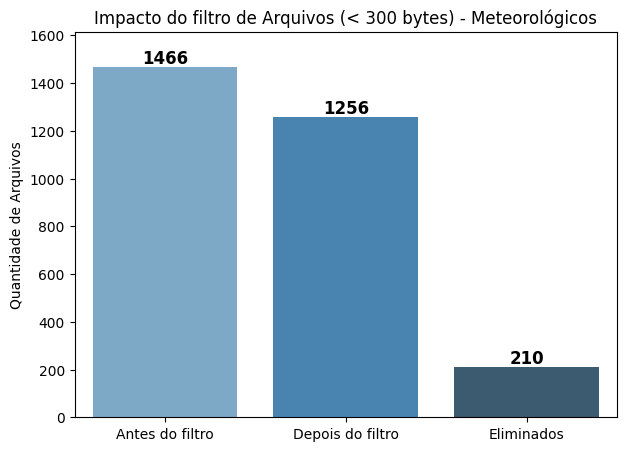

In [677]:
gera_grafico_barras_economia(df_arquivos_estacoes_met.shape[0], df_met_maior_300_bytes.shape[0], 300)

#### **Foi um bom corte! 210 arquivos inválidos foram retirados, o que nos dá mais de 14%, porém, para uma soma de espaço em disco é algo deveras irrelevante. Acredito que quando deixarmos apenas as variáveis necessárias ao Projeto, vamos conseguir uma economia maior de espaço em disco.**

#### Agora, vamos somar por estação o espaço em disco em bytes inicialmente que será ocupado por cada uma dessas estações na janela de 1997 até 2024 de arquivos meteorológicos.

In [678]:
df_arquivos_estacoes_met_espaco_disco = df_met_maior_300_bytes.groupby('Estacao', as_index=False)['Tamanho_Bytes'].sum()

In [679]:
total_espaco_met_mb = df_arquivos_estacoes_met_espaco_disco['Tamanho_Bytes'].sum() / (1024 * 1024)

In [680]:
total_espaco_met_mb

np.float64(305.95463943481445)

#### **Todos os arquivos meteorológicos brutos, sem tratamento, de todas as estações se fossem agrupados assim todos em um só dataset, teríamos um dataset contendo 306MB**.
#### Em um formato Parquet, com certeza seria muito menor.
#### Mais à frente, na seção de Pre-Processamento vamos diminuir mais ainda esse dataset para que possamos trabalhar nele sem a necessidade de extrair uma amostra.

#### **Para o dataset pluviométrico vamos retirar os arquivos vazios como já identificamos antes. Arquivos com menos de 200 bytes serão descartados da seleção.**

In [681]:
df_plv_maior_200_bytes = df_arquivos_estacoes_plv[df_arquivos_estacoes_plv['Tamanho_Bytes'] > 200]

Será que tivemos alguma economia? Será que é vísível? Vamos ver no gráfico abaixo:

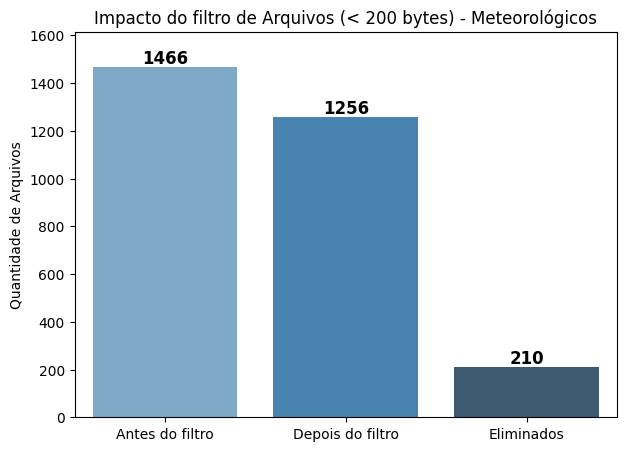

In [682]:
gera_grafico_barras_economia(df_arquivos_estacoes_plv.shape[0], df_plv_maior_200_bytes.shape[0], 200)

#### **O resultado foi exatamente o mesmo dos dados meteorológicos, os resultados foram bastante lineares.**

#### Agora, vamos somar por estação o espaço em disco em bytes inicialmente que será ocupado por cada uma dessas estações na janela de 1997 até 2024 de arquivos pluviométricos.

In [683]:
df_arquivos_estacoes_plv_espaco_disco = df_plv_maior_200_bytes.groupby('Estacao', as_index=False)['Tamanho_Bytes'].sum()

In [684]:
total_espaco_plv_mb = df_arquivos_estacoes_plv_espaco_disco['Tamanho_Bytes'].sum() / (1024 * 1024)

In [685]:
total_espaco_plv_mb

np.float64(1841.636513710022)

#### **Todos os arquivos pluviométricos brutos, sem tratamento, de todas as estações se fossem agrupados em um só dataset/dataframe, teríamos um volume de dados de 1.8 Gigabytes, o que é mais do que a capacidade permitida por projetos na versão gratuita do Github.**

#### **Diante deste contexto, não vamos mais utilizar o universo das 33 estações de monitoramento, mas sim os dados da estação *Guaratiba*.**
#### Um pouco mais sobre a Estação Guaratiba.
#### Entrou em funcionamento no dia 01/01/1997.

<center>

![Estação Guaratiba](https://websempre.rio.rj.gov.br/media/estacoes/Guaratiba1_site_1.jpg)

</center>

#### A **Estação de Guaratiba** é uma estação meteorológica completa, localizada na área da restinga da Marambaia. Além de chuvas, esta estação registra dados de Temperatura, Pressão Atmosférica, Umidade do Ar e Vento. Seus dados são importantes no monitoramento dos sistemas meteorológicos que avançam do sul do estado do Rio.



#### Agora, vamos verificar os tamanhos totais ao utilizar apenas os dados dessas estações.

In [686]:
df_filtrado_plv = df_plv_maior_200_bytes[df_plv_maior_200_bytes['Estacao'].isin(estacoes_selecionadas)]
df_filtrado_met = df_met_maior_300_bytes[df_met_maior_300_bytes['Estacao'].isin(estacoes_selecionadas)]

In [687]:
df_arquivos_estacoes_plv_espaco_disco_novo = df_filtrado_plv.groupby('Estacao', as_index=False)['Tamanho_Bytes'].sum()
df_arquivos_estacoes_met_espaco_disco_novo = df_filtrado_met.groupby('Estacao', as_index=False)['Tamanho_Bytes'].sum()

In [688]:
total_espaco_plv_mb_novo = df_arquivos_estacoes_plv_espaco_disco_novo['Tamanho_Bytes'].sum() / (1024 * 1024)
total_espaco_met_mb_novo = df_arquivos_estacoes_met_espaco_disco_novo['Tamanho_Bytes'].sum() / (1024 * 1024)

In [689]:
total_espaco_plv_mb_novo

np.float64(60.880661964416504)

In [690]:
total_espaco_met_mb_novo

np.float64(54.78505039215088)

#### **Após selecionarmos apenas duas estações, os valores caíram drasticamente: 121MB para dados pluviométricos e 85MB para dados meteorológicos**

#### **Em forma gráfica, essa discrepância fica mais à mostra**

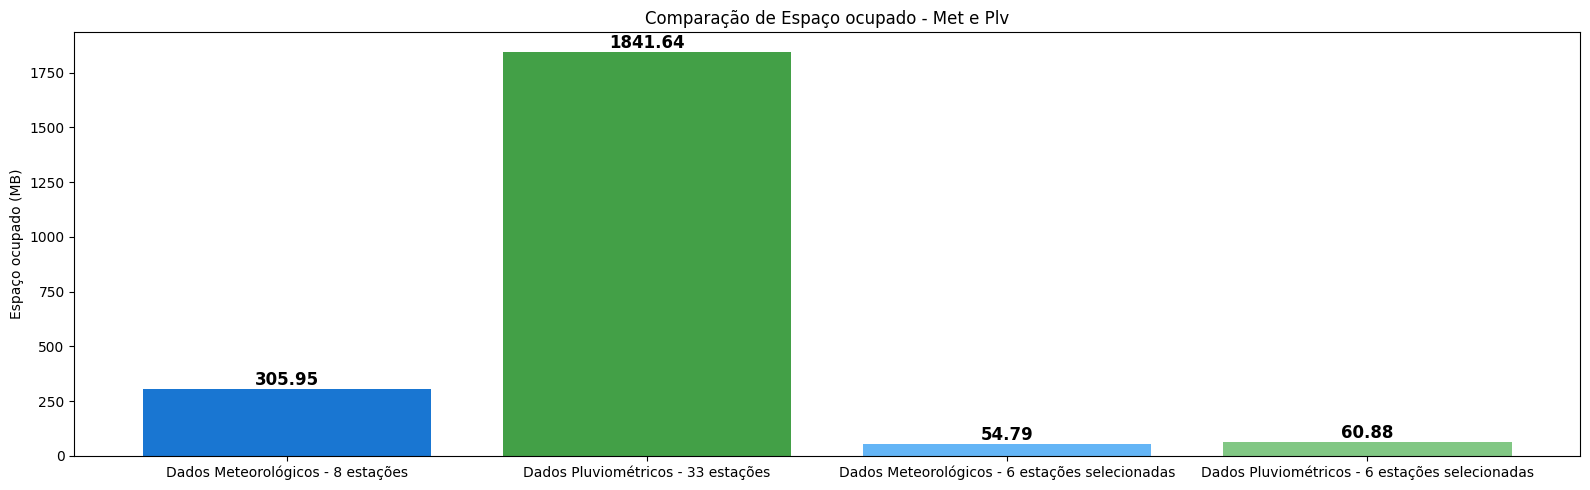

In [691]:
gera_grafico_de_barras_amostra_x_universo(total_espaco_met_mb,total_espaco_plv_mb,total_espaco_met_mb_novo,total_espaco_plv_mb_novo)

#### Na etapa de Pre-Processamento, junto com a Análise Exploratória de Dados, vamos diminuir mais ainda esse conjunto de dados.

#### **Análise dos dados do El Niño/La Niña coletados do NOAA**

#### Com o ONI (Oceanic Niño Index), podemos criar um gráfico bem interessante para mostrar o quão forte ele têm estado desde a década de 90 do século XX até os dias de hoje.

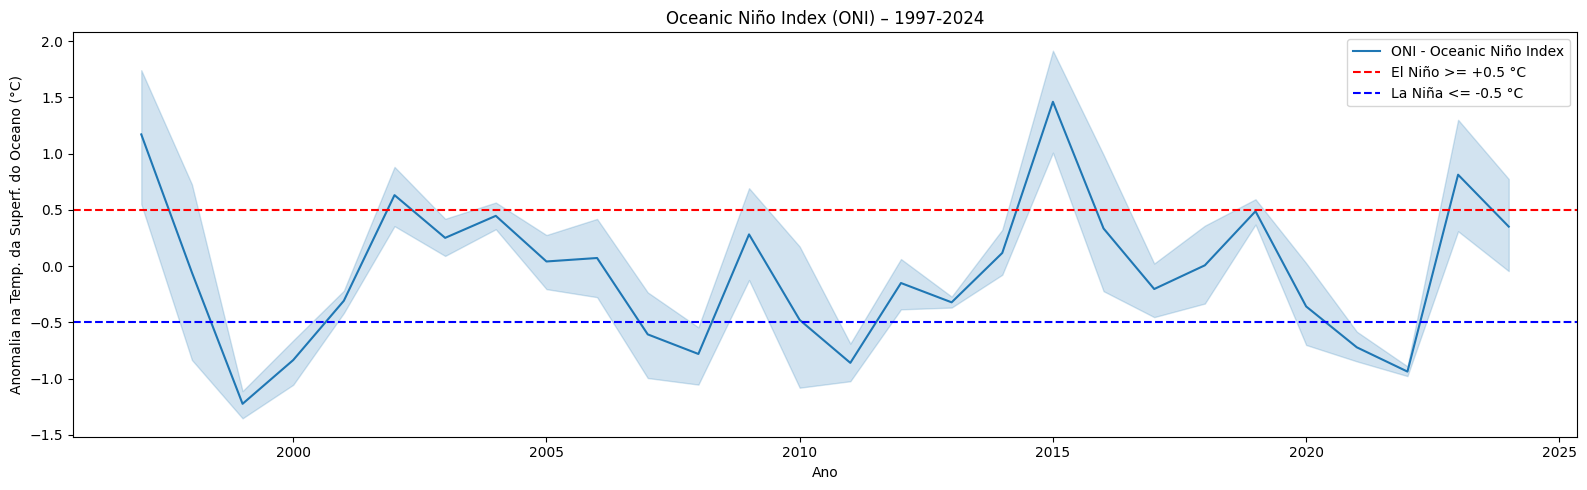

In [692]:
gera_grafico_enos(df_enos)

#### Verificando graficamente se existe alguma relação entre a temperatura do Oceano Pacífico e o coeficiente de anomalia tanto para o El Niño, aquecimento, quanto para a La Niña, resfriamento.

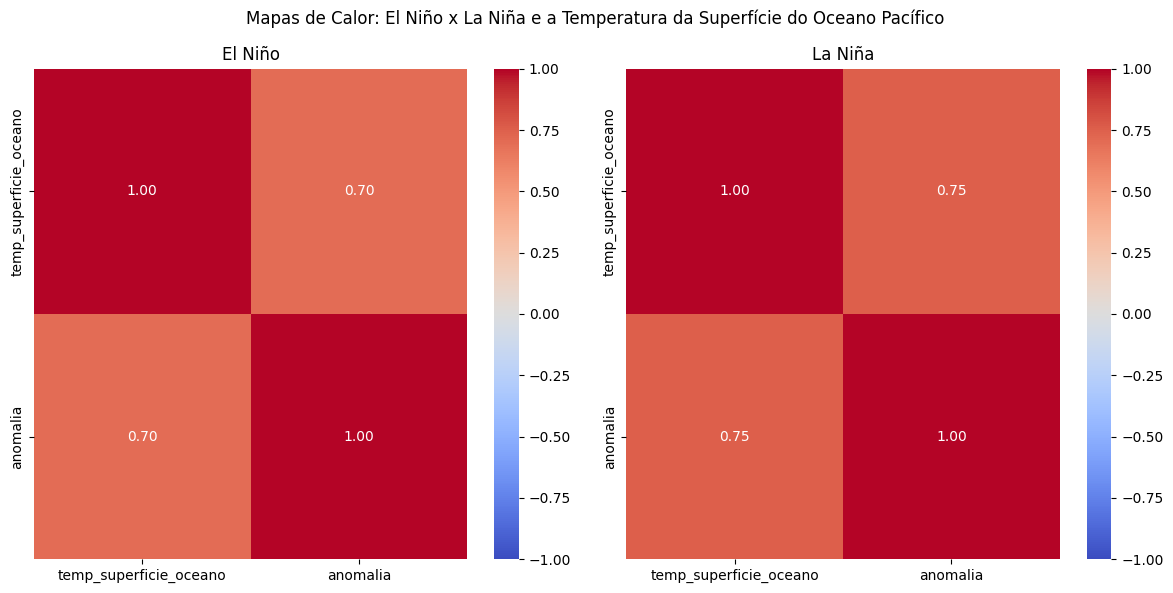

In [693]:
# Separa o El Niño e a La Niña
df_el_nino = df_enos[df_enos['anomalia'] >= 0.5]
df_la_nina = df_enos[df_enos['anomalia'] <= -0.5]

# Calcula as matrizes de correlação
corr_el_nino = df_el_nino[['temp_superficie_oceano', 'anomalia']].corr()
corr_la_nina = df_la_nina[['temp_superficie_oceano', 'anomalia']].corr()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(corr_el_nino, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('El Niño')

sns.heatmap(corr_la_nina, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('La Niña')

fig.suptitle('Mapas de Calor: El Niño x La Niña e a Temperatura da Superfície do Oceano Pacífico')
plt.tight_layout()
plt.show()

#### De acordo com os coeficiente de correlação de 70% e 75%, significam que a anomalia acompanha a temperatura do Oceano, tanto para aquecimento quanto para resfriamento. Quanto maior ou menor a temperatura do Oceano. Isso faz total sentido já que o ENOS é caracterizado justamente por variações anômalas da temperatura do Oceano na região do Pacífico.
#### Os dados disponíveis pelo NOAA estão validados matemáticamente e com isso, podemos seguir com o cruzamento entre os dados climáticos extraídos do AlertaRio e o NOAA.

#### De 1997 pra cá, tivemos alguns eventos extremos de ENOS, veremos como isso se materializa na etapa de Pós Processamento.

### **Criação do dataset principal.**

#### **Nessa seção, vamos criar o dataset padrão apenas com as variáveis que precisamos utilizar para que na etapa de pré processamento.**

#### **Para facilitar o trabalho de limpeza, criamos a função `elimina_colunas_inuteis`**

#### **Nos dados Meteorológicos e Pluviométricos**:
- Retirar as outras colunas que não sejam Dia, Hora e Temperatura

In [694]:
df_met_final = elimina_colunas_inuteis(df_met_maior_300_bytes, '/content/clima-rj-analise/alertario/zips', '/content/clima-rj-analise/alertario/arquivos_estacoes.csv',estacoes_selecionadas)

Processando zip /content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip...
Processando arquivo guaratiba_199701_Met.txt...
Processando zip /content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip...
Processando arquivo guaratiba_199702_Met.txt...
Processando zip /content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip...
Processando arquivo guaratiba_199703_Met.txt...
Processando zip /content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip...
Processando arquivo guaratiba_199704_Met.txt...
Processando zip /content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip...
Processando arquivo guaratiba_199705_Met.txt...
Processando zip /content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip...
Processando arquivo guaratiba_199706_Met.txt...
Processando zip /content/clima-rj-analise/alertario/zips/met/dados_meteorologicos_1997.zip...
Processando arquivo guaratiba_199707_Met.txt...
Proces

In [695]:
df_met_final.head()

,Dia,Hora,Temperatura,Umidade,Estacao
0,01/01/1997,01:07:40,ND,ND,Guaratiba
1,01/01/1997,01:22:40,ND,ND,Guaratiba
2,01/01/1997,01:37:40,ND,ND,Guaratiba
3,01/01/1997,01:52:40,ND,ND,Guaratiba
4,01/01/1997,02:07:40,ND,ND,Guaratiba


In [696]:
df_met_final.tail()

,Dia,Hora,Temperatura,Umidade,Estacao
667209,31/12/2024,22:45:00,23.6,100,Guaratiba
667210,31/12/2024,23:00:00,23.5,100,Guaratiba
667211,31/12/2024,23:15:00,23.3,100,Guaratiba
667212,31/12/2024,23:30:00,23.3,100,Guaratiba
667213,31/12/2024,23:45:00,23.5,100,Guaratiba


In [697]:
df_met_final.shape

(667214, 5)

In [698]:
df_plv_final = elimina_colunas_inuteis(df_plv_maior_200_bytes, '/content/clima-rj-analise/alertario/zips', '/content/clima-rj-analise/alertario/arquivos_estacoes.csv',estacoes_selecionadas)

Processando zip /content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip...
Processando arquivo guaratiba_199701_Plv.txt...
Processando zip /content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip...
Processando arquivo guaratiba_199702_Plv.txt...
Processando zip /content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip...
Processando arquivo guaratiba_199703_Plv.txt...
Processando zip /content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip...
Processando arquivo guaratiba_199704_Plv.txt...
Processando zip /content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip...
Processando arquivo guaratiba_199705_Plv.txt...
Processando zip /content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip...
Processando arquivo guaratiba_199706_Plv.txt...
Processando zip /content/clima-rj-analise/alertario/zips/plv/dados_pluviometricos_1997.zip...
Processando arquivo guaratiba_199707_Plv.txt...
Proces

In [699]:
df_plv_final.shape

(991573, 4)

#### Ao final desse processamento, temos os dois dataframes: met e plv.

In [700]:
df_plv_final

,Dia,Hora,24 h,Estacao
0,01/01/1997,01:07:40,ND,Guaratiba
1,01/01/1997,01:22:40,ND,Guaratiba
2,01/01/1997,01:37:40,ND,Guaratiba
3,01/01/1997,01:52:40,ND,Guaratiba
4,01/01/1997,02:07:40,ND,Guaratiba
...,...,...,...,...
991568,31/12/2024,23:35:00,0.0,Guaratiba
991569,31/12/2024,23:40:00,0.0,Guaratiba
991570,31/12/2024,23:45:00,0.0,Guaratiba
991571,31/12/2024,23:50:00,0.0,Guaratiba


In [701]:
df_met_final

,Dia,Hora,Temperatura,Umidade,Estacao
0,01/01/1997,01:07:40,ND,ND,Guaratiba
1,01/01/1997,01:22:40,ND,ND,Guaratiba
2,01/01/1997,01:37:40,ND,ND,Guaratiba
3,01/01/1997,01:52:40,ND,ND,Guaratiba
4,01/01/1997,02:07:40,ND,ND,Guaratiba
...,...,...,...,...,...
667209,31/12/2024,22:45:00,23.6,100,Guaratiba
667210,31/12/2024,23:00:00,23.5,100,Guaratiba
667211,31/12/2024,23:15:00,23.3,100,Guaratiba
667212,31/12/2024,23:30:00,23.3,100,Guaratiba


#### Vamos unir os dois dataframes em um dataframe só onde tenhamos os campos Dia, Hora, 24 h, Temperatura e o nome da Estação, vamos juntar os dois contendo os mesmos dados de Dia, Hora e Estação:

In [702]:
df_inicial_unico_plv_met = pd.merge(df_met_final, df_plv_final, on=['Dia','Hora','Estacao'], how='inner')

#### Essa é a dimensão final de nosso conjunto de dados unindo dos Meteorológicos e Pluviométricos

In [703]:
df_inicial_unico_plv_met.shape

(654294, 6)

In [704]:
df_inicial_unico_plv_met.head()

,Dia,Hora,Temperatura,Umidade,Estacao,24 h
0,01/01/1997,01:07:40,ND,ND,Guaratiba,ND
1,01/01/1997,01:22:40,ND,ND,Guaratiba,ND
2,01/01/1997,01:37:40,ND,ND,Guaratiba,ND
3,01/01/1997,01:52:40,ND,ND,Guaratiba,ND
4,01/01/1997,02:07:40,ND,ND,Guaratiba,ND


In [705]:
df_inicial_unico_plv_met.tail()

,Dia,Hora,Temperatura,Umidade,Estacao,24 h
654289,31/12/2024,22:45:00,23.6,100,Guaratiba,0.0
654290,31/12/2024,23:00:00,23.5,100,Guaratiba,0.0
654291,31/12/2024,23:15:00,23.3,100,Guaratiba,0.0
654292,31/12/2024,23:30:00,23.3,100,Guaratiba,0.0
654293,31/12/2024,23:45:00,23.5,100,Guaratiba,0.0


#### Após a junção dos datasets, temos a seguinte disposição dos campos:

In [706]:
df_inicial_unico_plv_met.dtypes

,0
Dia,object
Hora,object
Temperatura,object
Umidade,object
Estacao,object
24 h,object


In [707]:
df_inicial_unico_plv_met.describe()

,Dia,Hora,Temperatura,Umidade,Estacao,24 h
count,654294,654294,654294,654294,654294,654293.0
unique,6835,384,340,92,1,1634.0
top,01/11/2024,01:45:00,ND,ND,Guaratiba,0.0
freq,288,5316,145290,172399,654294,319463.0


#### **Tratar os dados**:
#### Vamos efetuar o tratamento simples dos campos, Vamos apenas converter as Datas, Horas.
#### Valores ND e Nulos serão marcados como "NaN", isso vai facilitar o tratamento e análise exploratória e Pré-processamento, o intuito aqui é passar o dataset inicial com os dados e seus tipos corrigidos.

#### **Convertendo a Variável Dia de object para datetime e alterando seu nome para Data**

In [708]:
df_inicial_unico_plv_met['Dia'] = pd.to_datetime(df_inicial_unico_plv_met['Dia'], format='%d/%m/%Y', errors='coerce')
df_inicial_unico_plv_met.rename(columns={'Dia': 'Data'})

,Data,Hora,Temperatura,Umidade,Estacao,24 h
0,1997-01-01,01:07:40,ND,ND,Guaratiba,ND
1,1997-01-01,01:22:40,ND,ND,Guaratiba,ND
2,1997-01-01,01:37:40,ND,ND,Guaratiba,ND
3,1997-01-01,01:52:40,ND,ND,Guaratiba,ND
4,1997-01-01,02:07:40,ND,ND,Guaratiba,ND
...,...,...,...,...,...,...
654289,2024-12-31,22:45:00,23.6,100,Guaratiba,0.0
654290,2024-12-31,23:00:00,23.5,100,Guaratiba,0.0
654291,2024-12-31,23:15:00,23.3,100,Guaratiba,0.0
654292,2024-12-31,23:30:00,23.3,100,Guaratiba,0.0


In [709]:
df_inicial_unico_plv_met.dtypes

,0
Dia,datetime64[ns]
Hora,object
Temperatura,object
Umidade,object
Estacao,object
24 h,object


#### **Convertendo a Variável Hora**

In [710]:
df_inicial_unico_plv_met['Hora'] = pd.to_datetime(df_inicial_unico_plv_met['Hora'], format='%H:%M:%S', errors='coerce')
df_inicial_unico_plv_met['Hora'] = df_inicial_unico_plv_met['Hora'].dt.time

In [711]:
df_inicial_unico_plv_met.head()

,Dia,Hora,Temperatura,Umidade,Estacao,24 h
0,1997-01-01,01:07:40,ND,ND,Guaratiba,ND
1,1997-01-01,01:22:40,ND,ND,Guaratiba,ND
2,1997-01-01,01:37:40,ND,ND,Guaratiba,ND
3,1997-01-01,01:52:40,ND,ND,Guaratiba,ND
4,1997-01-01,02:07:40,ND,ND,Guaratiba,ND


In [712]:
df_inicial_unico_plv_met.dtypes

,0
Dia,datetime64[ns]
Hora,object
Temperatura,object
Umidade,object
Estacao,object
24 h,object


#### Convertendo as variáveis Temperatura e 24 h em valores numéricos

In [713]:
df_inicial_unico_plv_met[['Temperatura','24 h','Umidade']] = df_inicial_unico_plv_met[['Temperatura','24 h','Umidade']].replace(["ND", "NULL", "-", "", None], np.nan)
df_inicial_unico_plv_met[['Temperatura','24 h','Umidade']] = df_inicial_unico_plv_met[['Temperatura','24 h', 'Umidade']].astype(float)

#### Após as conversões, temos nossas variáveis e seus tipos definidos.

In [714]:
df_inicial_unico_plv_met.dtypes

,0
Dia,datetime64[ns]
Hora,object
Temperatura,float64
Umidade,float64
Estacao,object
24 h,float64


#### Agora, vamos adicionar uma coluna em nosso dataframe final com os valores de Anomalia do El Niño/La Niña - ENOS - para que possamos identificar naquele dia e naquele mês qual a força do ENOS para verificações de fenômenos, essa coluna é uma das mais importantes pois será ela que nos ajudará a responder às hipóteses e formulações deste projeto.

#### Adição do Fenômeno ENOS e temperatura do Oceano na Região do Pacífico com o dataframe criado anteriormente.

In [715]:
df_enos

,periodo,ano,temp_superficie_oceano,anomalia
0,DJF,1950,24.72,-1.53
1,JFM,1950,25.17,-1.34
2,FMA,1950,25.75,-1.16
3,MAM,1950,26.12,-1.18
4,AMJ,1950,26.32,-1.07
...,...,...,...,...
900,DJF,2025,26.05,-0.59
901,JFM,2025,26.49,-0.38
902,FMA,2025,27.11,-0.18
903,MAM,2025,27.60,-0.09


#### Criando a coluna "mes" que traduzindo o mês em que está ocorrendo a anomalia e a temperatura da superficie do oceano.

In [716]:
df_enos['mes'] = df_enos['periodo'].apply(lambda x: period_to_month[x])

#### Separando os dados de ENOS à partir de Janeiro de 1997 até Dezembro de 2024

In [717]:
df_enos_1997_a_2024 = df_enos[(df_enos['ano'] >= 1997) & (df_enos['ano'] <= 2024)]

In [718]:
df_enos_1997_a_2024.dtypes

,0
periodo,object
ano,int64
temp_superficie_oceano,float64
anomalia,float64
mes,int64


#### **Antes de fazer a junção dos dois dataframes, é importante fazer uma cópia de segurança de nosso dataframe original**

In [719]:
df_inicial_unico_plv_met_enos = df_inicial_unico_plv_met.copy()
df_inicial_unico_plv_met_enos = df_inicial_unico_plv_met_enos.rename(columns={'Dia': 'Data'})
df_inicial_unico_plv_met_enos['Data'] = pd.to_datetime(df_inicial_unico_plv_met_enos['Data'])

#### **Efetuando a junção do ENOS aos nossos dados climáticos**

In [720]:
df_inicial_unico_plv_met_enos['ano'] = df_inicial_unico_plv_met_enos['Data'].dt.year
df_inicial_unico_plv_met_enos['mes'] = df_inicial_unico_plv_met_enos['Data'].dt.month

In [721]:
# Merge pelo ano e mes
df_inicial_unico_plv_met_enos = df_inicial_unico_plv_met_enos.merge(
    df_enos_1997_a_2024[['ano', 'mes', 'anomalia','temp_superficie_oceano']],
    on=['ano', 'mes'],
    how='left'
)

#### Agora, temos nosso dataframe inicial finalizado. Seguem as variáveis e seus tipos.

In [722]:
df_inicial_unico_plv_met_enos.dtypes

,0
Data,datetime64[ns]
Hora,object
Temperatura,float64
Umidade,float64
Estacao,object
24 h,float64
ano,int32
mes,int32
anomalia,float64
temp_superficie_oceano,float64


In [723]:
df_inicial_unico_plv_met_enos[(df_inicial_unico_plv_met_enos['Temperatura'] > 8) & (df_inicial_unico_plv_met_enos['24 h'] >= 0)]

,Data,Hora,Temperatura,Umidade,Estacao,24 h,ano,mes,anomalia,temp_superficie_oceano
70092,2004-01-01,00:07:40,23.8,91.0,Guaratiba,0.2,2004,1,0.69,27.3
70093,2004-01-01,00:22:40,24.0,91.0,Guaratiba,0.2,2004,1,0.69,27.3
70094,2004-01-01,00:37:40,24.0,91.0,Guaratiba,0.2,2004,1,0.69,27.3
70095,2004-01-01,00:52:40,23.7,91.0,Guaratiba,0.2,2004,1,0.69,27.3
70096,2004-01-01,01:07:40,23.7,91.0,Guaratiba,0.2,2004,1,0.69,27.3
...,...,...,...,...,...,...,...,...,...,...
654289,2024-12-31,22:45:00,23.6,100.0,Guaratiba,0.0,2024,12,-0.37,26.3
654290,2024-12-31,23:00:00,23.5,100.0,Guaratiba,0.0,2024,12,-0.37,26.3
654291,2024-12-31,23:15:00,23.3,100.0,Guaratiba,0.0,2024,12,-0.37,26.3
654292,2024-12-31,23:30:00,23.3,100.0,Guaratiba,0.0,2024,12,-0.37,26.3


# **3. Pré-Processamento**

## **Nota sobre pré-processamento de variáveis categóricas:**
## Nesta análise, não foi necessário aplicar técnicas de transformação como OneHotEncoding ou LabelEncoding para as variáveis categóricas (ex: ENSO_Fase, Estacao_do_ano, Periodo). Isso porque todas as operações estatísticas, gráficos e agrupamentos realizados utilizam diretamente os valores categóricos como grupos para agregação, sem a necessidade de transformar essas variáveis em formato numérico para algoritmos de machine learning.

## Caso fosse necessário aplicar métodos preditivos que exigem entrada numérica, a transformação das categorias seria recomendada. No entanto, para fins de análise exploratória e estatística descritiva, o tratamento original das categorias é suficiente.


### Vamos criar um novo dataframe como cópia do anterior

In [724]:
df_inicial_unico_plv_met_enos_pre_processado = df_inicial_unico_plv_met_enos.copy()

#### **Visualizando o padrão de matriz de ausência de dados por linha.**

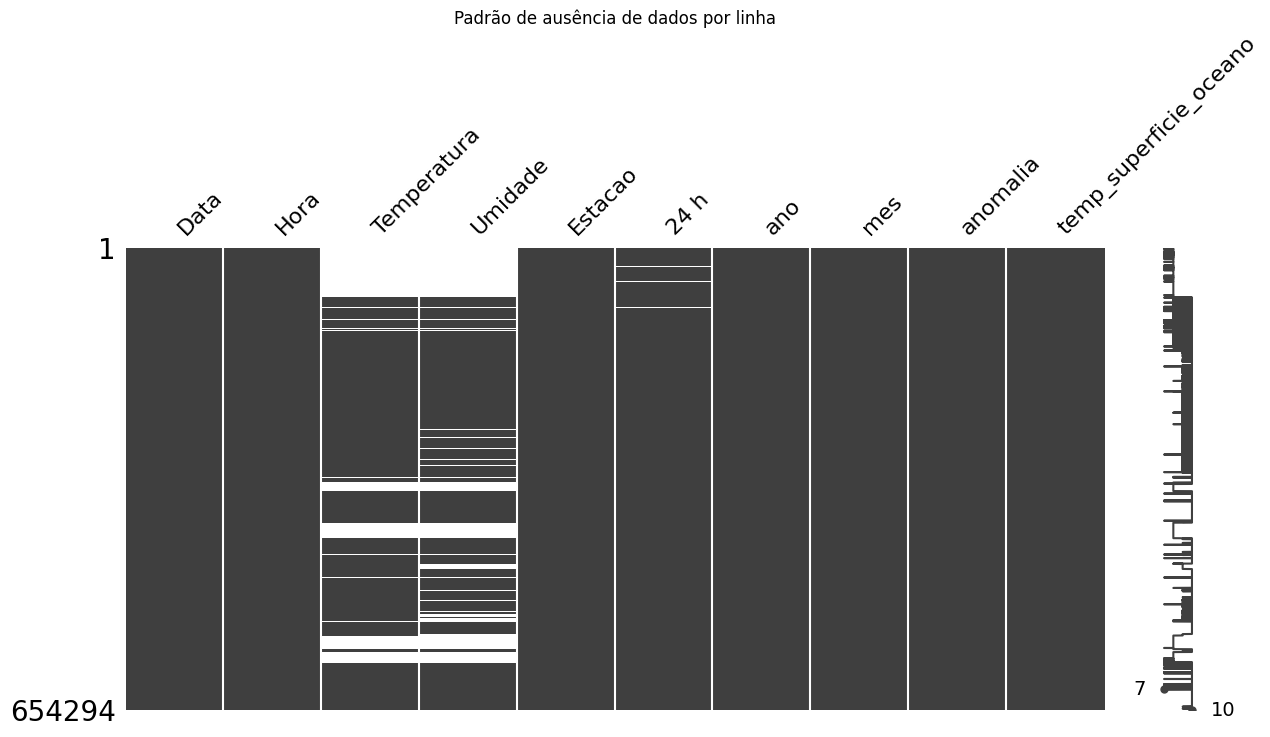

In [725]:
msno.matrix(df_inicial_unico_plv_met_enos_pre_processado,figsize=(14,6))
plt.title('Padrão de ausência de dados por linha')
plt.show()

#### **O gráfico de matriz de ausência mostra que as variáveis 'Temperatura', 'Umidade' e '24 h' apresentam falta de dados em diversos períodos, enquanto as outras variáveis estão praticamente completas, porém faltas maiores ocorrem nas variáveis 'Temperatura' e 'Umidade'. Essa visualização facilita identificar padrões de ausência e decidir as melhores estratégias de imputação ou exclusão de registros**

#### **Visualizando a hierarquia de colunas faltantes, o famoso dendrograma**

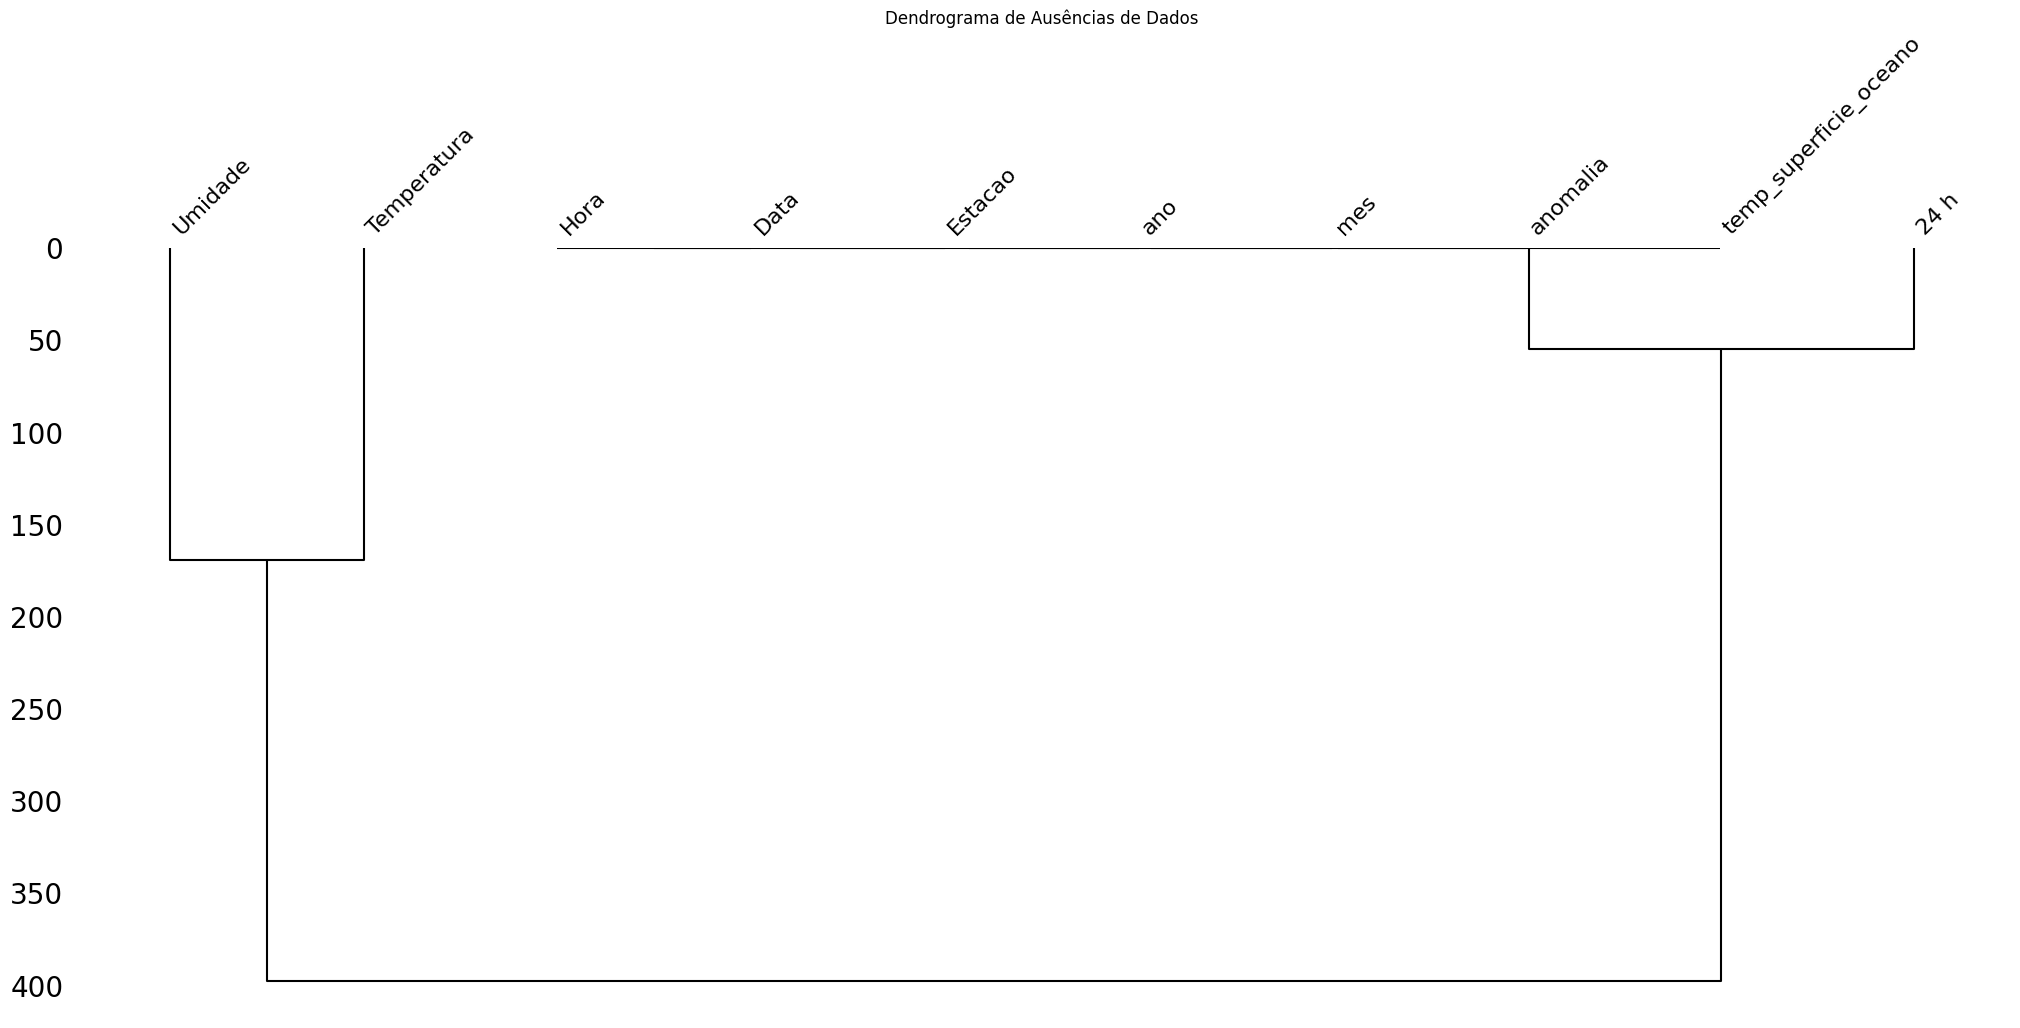

In [726]:
msno.dendrogram(df_inicial_unico_plv_met_enos_pre_processado)
plt.title('Dendrograma de Ausências de Dados')
plt.show()

#### **O dendrograma de ausências mostra que as variáveis '24 h' e 'temp_superficie_oceano' apresentam padrões de ausência semelhantes, sugerindo que sempre que faltam dados nas mesmas linhas do dataset. Por outro lado, a variável 'Temperatura' com a variável 'Umidade' apresentam padrões de ausência semelhantes, possivelmente dando a entender que ocorreram problemas de coleta em momentos diferentes ou por diferentes estações. As demais variáveis possuem ausências quase nulas.**

## **3.1 Análise Exploratória de Dados**

### Nesta etapa, vamos procurar anomalias, dados incorretos e outliers, fora do escopo de dados NaN tratados anteriormente.

### 3.1.1 - **Análise Exploratória nas variáveis Temperatura, Umidade e 24 h.**

#### **Variável Temperatura**

#### Verificando graficamente a proporção de dados inválidos com dados válidos.

In [727]:
# Total de linhas
total_linhas = len(df_inicial_unico_plv_met_enos_pre_processado)

# Total de valores válidos (não NaN) na coluna Umidade
validos = df_inicial_unico_plv_met_enos_pre_processado['Temperatura'].count()

# Total de valores NaN (inválidos) na coluna Umidade
invalidos = df_inicial_unico_plv_met_enos_pre_processado['Temperatura'].isna().sum()

print(f"Total de linhas: {total_linhas}")
print(f"Valores válidos (não NaN): {validos}")
print(f"Valores inválidos (NaN): {invalidos}")

Total de linhas: 654294
Valores válidos (não NaN): 509004
Valores inválidos (NaN): 145290


In [728]:
df_inicial_unico_plv_met_enos_pre_processado['Temperatura'].sort_values().unique()

array([ 1.1,  3.9,  5.3,  6. ,  7.2, 10.3, 10.4, 10.5, 10.7, 10.8, 10.9,
       11. , 11.1, 11.3, 11.4, 11.5, 11.6, 11.8, 11.9, 12. , 12.1, 12.2,
       12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3,
       13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4,
       14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5,
       15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6,
       16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7,
       17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8,
       18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9,
       20. , 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. ,
       21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1,
       22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2,
       23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3,
       24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25

#### Porém, temos valores acima de 40 graus muito acima da média, como valores acima de 42°C. Vamos gerar um histograma para entender essas faixas de temperatura e a frequência destas dentro de nosso dataframe.

In [729]:
# Identificando a quantidade de intervalors
n = len(df_inicial_unico_plv_met_enos_pre_processado['Temperatura'].dropna())
sturges = round(1 + 3.3 * np.log10(n))

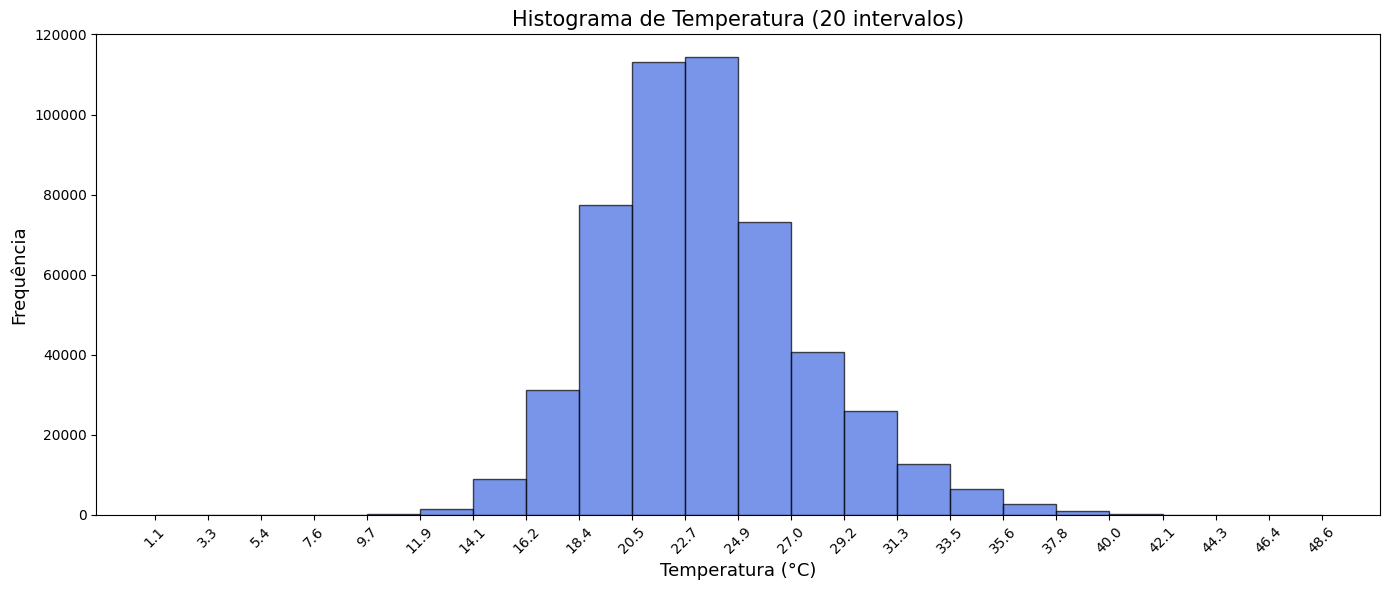

In [730]:
plt.figure(figsize=(14,6))

# Calcula os bins manualmente para capturar os limites
data_24h = df_inicial_unico_plv_met_enos_pre_processado['Temperatura'].dropna()
counts, bins, patches = plt.hist(data_24h, bins=22, color='royalblue', edgecolor='black', alpha=0.7)

# Ajusta os ticks do eixo X para mostrar todos os limites dos bins
plt.xticks(bins, [f"{b:.1f}" for b in bins], rotation=45, fontsize=10)

plt.xlabel('Temperatura (°C)', fontsize=13)
plt.ylabel('Frequência', fontsize=13)
plt.title(f'Histograma de Temperatura ({sturges} intervalos)', fontsize=15)
plt.tight_layout()
plt.show()

#### A maior porcentagem de temperatura está entre 20.5°C e 24.9°C, os valores acima de 42°C são realmente muito pequenos, o que significa que são realmente fenômenos extremos.

#### **Variável '24 h'**

#### Verificando graficamente a proporção de dados inválidos com dados válidos.

In [731]:
# Total de linhas
total_linhas = len(df_inicial_unico_plv_met_enos_pre_processado)

# Total de valores válidos (não NaN) na coluna Umidade
validos = df_inicial_unico_plv_met_enos_pre_processado['24 h'].count()

# Total de valores NaN (inválidos) na coluna Umidade
invalidos = df_inicial_unico_plv_met_enos_pre_processado['24 h'].isna().sum()

print(f"Total de linhas: {total_linhas}")
print(f"Valores válidos (não NaN): {validos}")
print(f"Valores inválidos (NaN): {invalidos}")

Total de linhas: 654294
Valores válidos (não NaN): 651262
Valores inválidos (NaN): 3032


#### **Variável Umidade**

#### Verificando graficamente a proporção de dados inválidos com dados válidos.

In [732]:
# Total de linhas
total_linhas = len(df_inicial_unico_plv_met_enos_pre_processado)

# Total de valores válidos (não NaN) na coluna Umidade
validos = df_inicial_unico_plv_met_enos_pre_processado['Umidade'].count()

# Total de valores NaN (inválidos) na coluna Umidade
invalidos = df_inicial_unico_plv_met_enos_pre_processado['Umidade'].isna().sum()

print(f"Total de linhas: {total_linhas}")
print(f"Valores válidos (não NaN): {validos}")
print(f"Valores inválidos (NaN): {invalidos}")

Total de linhas: 654294
Valores válidos (não NaN): 481895
Valores inválidos (NaN): 172399


### Para melhorar ainda mais a análise dessas anomalias nas variáveis, vamos adicionar algumas variáveis categóricas:  fenômeno ENOS de acordo com o grau de anomalia, Período do Dia e Estação do Ano

In [733]:
df_inicial_unico_plv_met_enos_pre_processado['ENSO_Fase'] = df_inicial_unico_plv_met_enos_pre_processado['anomalia'].apply(lambda x: classificar_enso(x))

In [734]:
df_inicial_unico_plv_met_enos_pre_processado['Estacao_do_ano'] = df_inicial_unico_plv_met_enos_pre_processado['Data'].apply(estacao_do_ano_hemisferio_sul)

In [735]:
df_inicial_unico_plv_met_enos_pre_processado['Periodo'] = df_inicial_unico_plv_met_enos_pre_processado['Hora'].apply(classifica_periodo)

#### Nosso Dataframe cresceu um pouco mais com as novas variaveis

In [736]:
df_inicial_unico_plv_met_enos_pre_processado.shape

(654294, 13)

In [737]:
df_inicial_unico_plv_met_enos_pre_processado.dtypes

,0
Data,datetime64[ns]
Hora,object
Temperatura,float64
Umidade,float64
Estacao,object
24 h,float64
ano,int32
mes,int32
anomalia,float64
temp_superficie_oceano,float64


## **3.2. Remover ou inputar os dados faltantes e tratar os dados inconsistentes**

### Eliminando linhas com dados inválidos em Temperatura, Umidade e 24 h (Chuva_acumulada_24h)

#### Primeiro, precisamos identificar essas linhas

In [738]:
df_inicial_unico_plv_met_enos_pre_processado.shape

(654294, 13)

In [739]:
colunas_verificar = ['Temperatura', 'Umidade', '24 h']
df_filtrado = df_inicial_unico_plv_met_enos_pre_processado.dropna(
    subset=colunas_verificar
).reset_index(drop=True)

In [740]:
df_inicial_unico_plv_met_enos_pre_processado = df_filtrado

In [741]:
df_inicial_unico_plv_met_enos_pre_processado.shape

(480697, 13)

In [742]:
df_inicial_unico_plv_met_enos_pre_processado.head()

,Data,Hora,Temperatura,Umidade,Estacao,24 h,ano,mes,anomalia,temp_superficie_oceano,ENSO_Fase,Estacao_do_ano,Periodo
0,2004-01-01,00:07:40,23.8,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
1,2004-01-01,00:22:40,24.0,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
2,2004-01-01,00:37:40,24.0,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
3,2004-01-01,00:52:40,23.7,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
4,2004-01-01,01:07:40,23.7,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada


### **3.2.1. Variável Temperatura**

#### Observando os valores únicos, identificamos valores com **temperaturas abaixo de zero** até a **temperatura de 8°C** e esses valores podem significar, em sua maioria, problemas no envio dos dados. Vamos trocar esses valores por NaN para inutilizá-los.

In [743]:
df_inicial_unico_plv_met_enos_pre_processado_sem_temperatura_negativa = df_inicial_unico_plv_met_enos_pre_processado.copy()
df_inicial_unico_plv_met_enos_pre_processado_sem_temperatura_negativa.loc[df_inicial_unico_plv_met_enos_pre_processado_sem_temperatura_negativa['Temperatura'] < 8, 'Temperatura'] = np.nan

#### Após a eliminação das temperaturas mais baixas incorretas, nosso dataframe fica mais limpo, mas ainda não acabou a Análise para limpeza.

In [744]:
df_inicial_unico_plv_met_enos_pre_processado_sem_temperatura_negativa['Temperatura'].sort_values().unique()

array([10.3, 10.4, 10.5, 10.7, 10.8, 10.9, 11. , 11.1, 11.3, 11.4, 11.5,
       11.6, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7,
       12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8,
       13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9,
       15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. ,
       16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1,
       17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. , 18.1, 18.2,
       18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1, 19.2, 19.3,
       19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1, 20.2, 20.3, 20.4,
       20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2, 21.3, 21.4, 21.5,
       21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3, 22.4, 22.5, 22.6,
       22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7,
       23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8,
       24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25

#### Vamos extrair o **Histograma** novamente para validações de faixas de valores

In [745]:
# Identificando a quantidade de intervalors
n = len(df_inicial_unico_plv_met_enos_pre_processado_sem_temperatura_negativa['Temperatura'].dropna())
sturges = round(1 + 3.3 * np.log10(n))

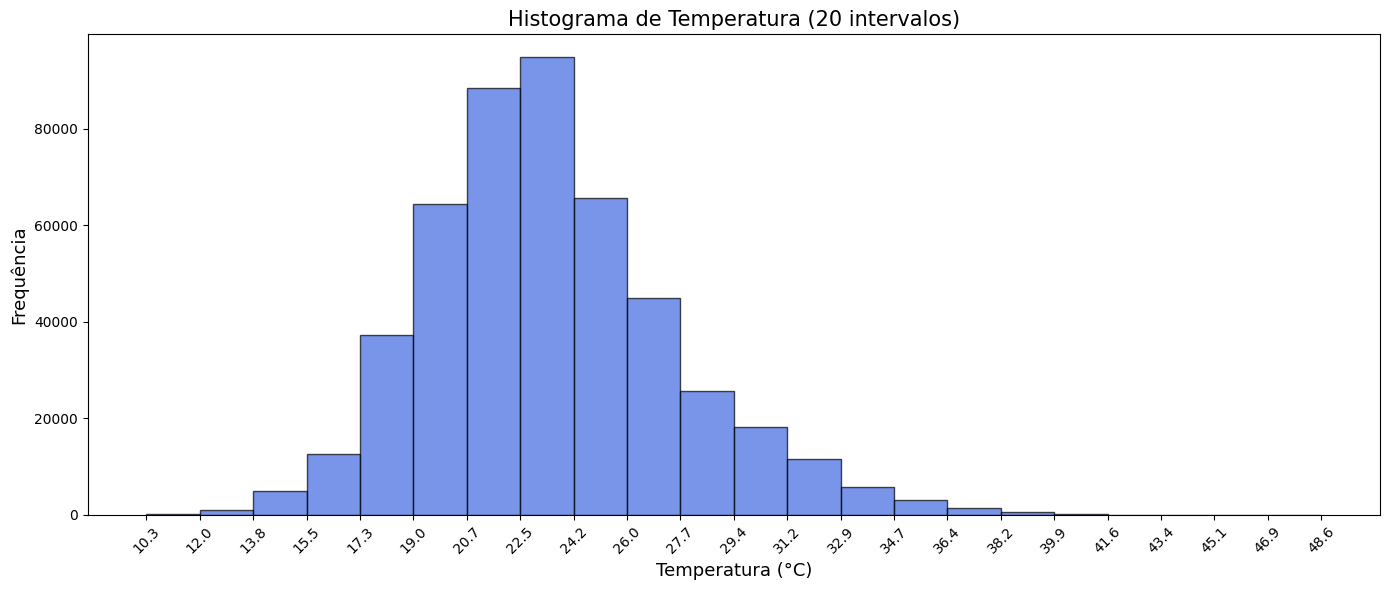

In [746]:
plt.figure(figsize=(14,6))

# Calcula os bins manualmente para capturar os limites
data_24h = df_inicial_unico_plv_met_enos_pre_processado_sem_temperatura_negativa['Temperatura'].dropna()
counts, bins, patches = plt.hist(data_24h, bins=22, color='royalblue', edgecolor='black', alpha=0.7)

# Ajusta os ticks do eixo X para mostrar todos os limites dos bins
plt.xticks(bins, [f"{b:.1f}" for b in bins], rotation=45, fontsize=10)

plt.xlabel('Temperatura (°C)', fontsize=13)
plt.ylabel('Frequência', fontsize=13)
plt.title(f'Histograma de Temperatura ({sturges} intervalos)', fontsize=15)
plt.tight_layout()
plt.show()

#### Houve uma mudança na distribuição das frequências de temperaturas, a maior frequência está entre 20.7°C e 24.2°C, com a eliminação de baixas temperaturas incorretas, vamos limpando o nosso dataframe para mostrar dados cada vez mais verossímeis.

#### **Agora, nosso objetivo é "caçar" temperaturas discrepantes de acordo com o período do dia e estação do ano. Observamos altas temperaturas, bem acima dos 40°C.**
#### A primeira verificação será quando o ENOS está neutro pois assim teremos as médias dos períodos e as temperaturas mais "normais", com o ENOS entre El Niño e La Niña não teremos valores confiáveis por causa dos fenômenos de aquecimento e resfriamento já elencados aqui.
#### Quando tentamos definir "normalidade" usando como parâmetro os períodos em que o ENOS (ENSO) está Neutro, então os valores de Temperatura em situações "Neutro" viram nosso "baseline" climático.

In [747]:
df_dados_climaticos = df_inicial_unico_plv_met_enos_pre_processado_sem_temperatura_negativa.copy()

In [748]:
df_dados_climaticos.shape

(480697, 13)

In [749]:
# Limites para a normalidade (ENOS Neutro)
df_baseline_climatico = df_dados_climaticos[df_inicial_unico_plv_met_enos_pre_processado_sem_temperatura_negativa['ENSO_Fase'] == 'Neutro'].groupby(['Periodo','Estacao_do_ano'])['Temperatura'].agg(['mean','median','std','min','max','quantile'])

In [750]:
df_baseline_climatico

mean  median       std   min   max  quantile
Periodo   Estacao_do_ano                                                   
Madrugada Inverno         18.743682    18.8  2.433646  10.3  47.5      18.8
          Outono          19.971349    20.1  2.399506  11.5  29.7      20.1
          Primavera       20.880642    21.0  2.145736  11.9  29.6      21.0
          Verão           23.068896    23.0  1.647912  18.3  29.2      23.0
Manhã     Inverno         22.150146    21.8  3.979667  10.7  39.8      21.8
          Outono          23.188232    23.1  3.564160  10.5  36.8      23.1
          Primavera       24.522992    23.8  3.887693  13.5  40.8      23.8
          Verão           26.573406    26.3  3.641011  11.1  38.9      26.3
Noite     Inverno         20.188302    20.3  2.189551  11.5  38.2      20.3
          Outono          21.522134    21.6  2.222455  13.5  29.3      21.6
          Primavera       22.048728    22.0  2.006665  14.7  32.0      22.0
          Verão           24.759753    24.6  2.111080  16.0  34.3      24.6
Tarde     Inverno         23.938906    23.1  3.924530  13.7  42.5      23.1
          Outono          24.777818    24.6  3.023718  17.0  39.1      24.6
          Primavera       25.400396    24.7  3.699121  15.9  43.2      24.7
          Verão           28.352657    28.1  3.463333  10.4  40.2      28.1

#### Durante a análise dos dados de temperatura sob condições ENOS Neutro, vimos valores máximos completamente atípicos (ex: temperaturas superiores a 40°C durante a madrugada e no inverno), incompatíveis com registros históricos e condições climáticas, mesmo extremas, do Rio de Janeiro. Esses valores devem ser analisados mais à fundo e tratados como outliers e substituídos pela mediana do respectivo grupo de período e estação do ano, respeitando limites físicos realistas.
#### Vamos usar estatísticas descritivas utilizando as estações, Período e Estações do ano para identificar valores incorretos e depois tratá-los como NaN e aplicar algum valor estatístico neles após isso na próxima seção.
#### Vamos deixar os dados falarem conosco.

In [751]:
ordem_estacao_ano = ['Outono','Inverno', 'Primavera', 'Verão']
ordem_periodo = ['Madrugada', 'Manhã', 'Tarde', 'Noite']

estat_descr_enos_neutro = df_dados_climaticos.groupby(['Periodo','Estacao_do_ano'])['Temperatura'].agg(
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    median='median',
    mean='mean',
    std='std'
).reset_index()
estat_descr_enos_neutro['iqr'] = estat_descr_enos_neutro['q3'] - estat_descr_enos_neutro['q1']
estat_descr_enos_neutro['limite_inf'] = estat_descr_enos_neutro['q1'] - 1.5 * estat_descr_enos_neutro['iqr']
estat_descr_enos_neutro['limite_sup'] = estat_descr_enos_neutro['q3'] + 1.5 * estat_descr_enos_neutro['iqr']
estat_descr_enos_neutro['Estacao_do_ano'] = pd.Categorical(estat_descr_enos_neutro['Estacao_do_ano'], categories=ordem_estacao_ano, ordered=True)
estat_descr_enos_neutro['Periodo'] = pd.Categorical(estat_descr_enos_neutro['Periodo'], categories=ordem_periodo, ordered=True)
estat_descr_enos_neutro = estat_descr_enos_neutro.sort_values(['Estacao_do_ano', 'Periodo']).reset_index(drop=True)

#### Agora, vamos observar o resultado com a aplicação da Estatística Descritiva

In [752]:
estat_descr_enos_neutro

,Periodo,Estacao_do_ano,q1,q3,median,mean,std,iqr,limite_inf,limite_sup
0,Madrugada,Outono,18.8,22.4,20.7,20.551330,2.470220,3.6,13.40,27.80
1,Manhã,Outono,21.3,26.4,23.7,23.905682,3.803419,5.1,13.65,34.05
2,Tarde,Outono,23.1,27.3,25.1,25.377660,3.260615,4.2,16.80,33.60
3,Noite,Outono,20.5,23.8,22.1,22.088048,2.376978,3.3,15.55,28.75
4,Madrugada,Inverno,17.4,20.5,19.0,18.941881,2.443484,3.1,12.75,25.15
5,Manhã,Inverno,19.7,24.6,22.0,22.399901,4.013368,4.9,12.35,31.95
6,Tarde,Inverno,21.5,26.0,23.4,24.142996,3.945541,4.5,14.75,32.75
7,Noite,Inverno,19.1,21.6,20.4,20.370324,2.197769,2.5,15.35,25.35
8,Madrugada,Primavera,19.6,22.6,21.2,21.122680,2.362156,3.0,15.10,27.10
9,Manhã,Primavera,21.8,26.5,24.0,24.523642,3.945580,4.7,14.75,33.55


In [753]:
# df_dados_climaticos = df_dados_climaticos.merge(
#     estat_descr_enos_neutro[['Periodo','Estacao_do_ano','limite_inf','limite_sup']],
#     on=['Periodo','Estacao_do_ano'],
#     how='left'
# )

In [754]:
df_dados_climaticos

,Data,Hora,Temperatura,Umidade,Estacao,24 h,ano,mes,anomalia,temp_superficie_oceano,ENSO_Fase,Estacao_do_ano,Periodo
0,2004-01-01,00:07:40,23.8,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
1,2004-01-01,00:22:40,24.0,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
2,2004-01-01,00:37:40,24.0,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
3,2004-01-01,00:52:40,23.7,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
4,2004-01-01,01:07:40,23.7,91.0,Guaratiba,0.2,2004,1,0.69,27.3,El Niño fraco,Verão,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480692,2024-12-31,22:45:00,23.6,100.0,Guaratiba,0.0,2024,12,-0.37,26.3,Neutro,Verão,Noite
480693,2024-12-31,23:00:00,23.5,100.0,Guaratiba,0.0,2024,12,-0.37,26.3,Neutro,Verão,Noite
480694,2024-12-31,23:15:00,23.3,100.0,Guaratiba,0.0,2024,12,-0.37,26.3,Neutro,Verão,Noite
480695,2024-12-31,23:30:00,23.3,100.0,Guaratiba,0.0,2024,12,-0.37,26.3,Neutro,Verão,Noite


In [764]:
df_pre_processado_final = df_dados_climaticos.copy()

#### Os limites de normalidade estatística (quartis, IQR, limites inferior e superior) foram definidos exclusivamente com base nos dados observados durante a fase Neutra do ENOS (El Niño–Oscilação Sul). Esses valores servem como baseline climático e referência para a identificação dos demais períodos, garantindo que qualquer análise ou comparação futura esteja ancorada no padrão de variabilidade considerado “normal” para a região e o período analisado.

Diante disso, vamos limpar todos os outliers baseado no IQR para todos os dados do dataframe para que possamos partir para a avaliação dos resultados e responder Às Hipóteses e Problemas na próxima etapa. Antes disso, vamos mostrar um gráfico que responderia à Premissa 1 e Hipótese Central 1, sem tratamento de outliers

In [774]:
df_pre_processado_final['ENSO_Grupo'] = df_pre_processado_final['ENSO_Fase'].apply(
    lambda x: 'El Niño' if 'El Niño' in str(x) else
              'La Niña' if 'La Niña' in str(x) else
              'Neutro'
)

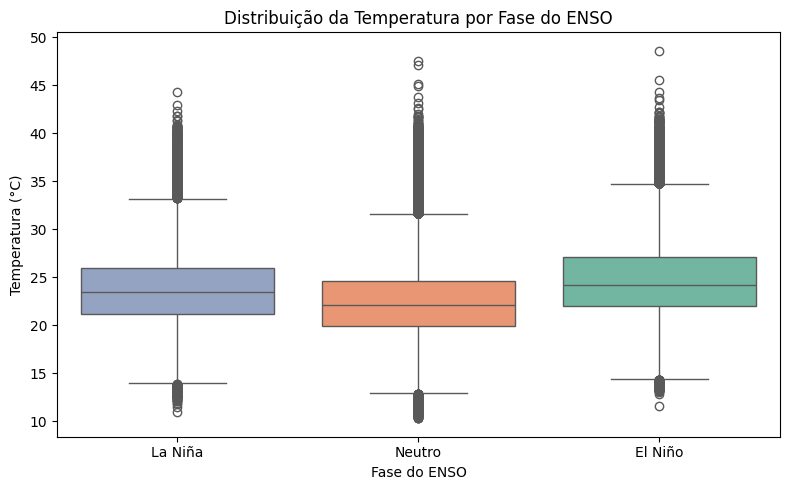

In [775]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='ENSO_Grupo',
    y='Temperatura',
    data=df_pre_processado_final,
    order=['La Niña', 'Neutro', 'El Niño'],
    hue='ENSO_Grupo',      # <-- Adicionado!
    palette="Set2",
    legend=False           # <-- Adicionado!
)
plt.title('Distribuição da Temperatura por Fase do ENSO')
plt.xlabel('Fase do ENSO')
plt.ylabel('Temperatura (°C)')
plt.tight_layout()
plt.show()

#### Podemos ver que acima ou abaixo dos "Bigodes" do boxplot, temos vários outliers, esse gráfico já responde à hipotese Central 1 e Premissa 1, mas podemos tratar esses outliers e mostrar apenas a influência do Fenômeno ENOS no Rio de Janeiro.

#### Eliminando os outliers

In [776]:
dfs = []

for grupo in ['La Niña', 'Neutro', 'El Niño']:
    df_g = df_pre_processado_final[df_pre_processado_final['ENSO_Grupo'] == grupo].copy()
    Q1 = df_g['Temperatura'].quantile(0.25)
    Q3 = df_g['Temperatura'].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    df_g = df_g[(df_g['Temperatura'] >= limite_inf) & (df_g['Temperatura'] <= limite_sup)]
    dfs.append(df_g)

# Junta tudo novamente
df_sem_outlier = pd.concat(dfs).reset_index(drop=True)

## **Avaliar os resultados**

###  **Premissa 1 & Hipótese Central 1:**
#### Eventos de El Niño estão associados ao aumento das temperaturas médias e à ocorrência de ondas de calor na cidade do Rio de Janeiro.

#### **Gráfico: Boxplot de Temperatura por Fase do ENSO**

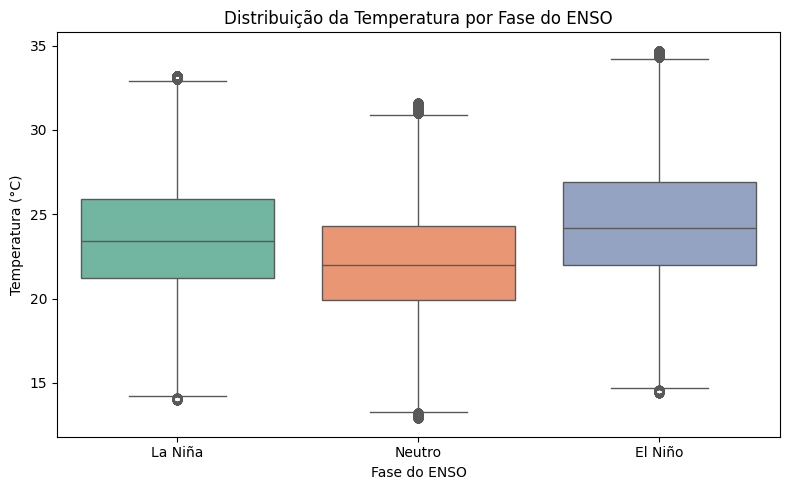

In [789]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='ENSO_Grupo',
    y='Temperatura',
    data=df_sem_outlier,
    order=['La Niña', 'Neutro', 'El Niño'],
    hue='ENSO_Grupo',      # <-- Adicionado!
    palette="Set2",
    legend=False           # <-- Adicionado!
)
plt.title('Distribuição da Temperatura por Fase do ENSO')
plt.xlabel('Fase do ENSO')
plt.ylabel('Temperatura (°C)')
plt.tight_layout()
plt.show()

#### O boxplot revela que durante eventos de El Niño, tanto a mediana quanto os valores superiores de temperatura são mais elevados em comparação aos anos neutros e, principalmente, aos anos de La Niña. Isso reforça a associação entre El Niño e aumento das temperaturas médias, assim como a maior frequência de ondas de calor no Rio de Janeiro.

### **Premissa 2 & Hipótese Central 2**
#### **Eventos de La Niña tendem a favorecer a diminuição das temperaturas médias e o aumento de episódios de frio.**

#### **Gráfico: Médias de Temperatura por ENSO**

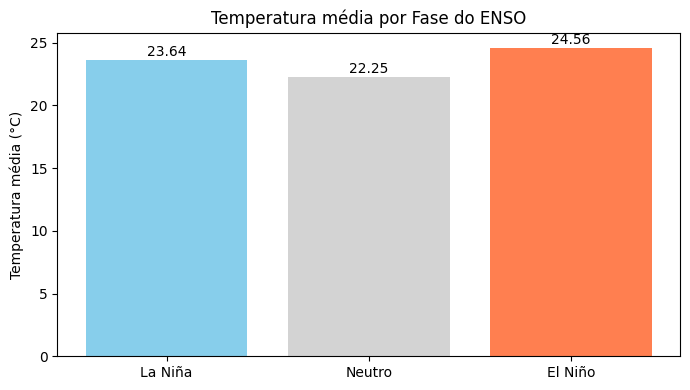

In [794]:
medias = df_sem_outlier.groupby('ENSO_Grupo')['Temperatura'].mean().reindex(['La Niña', 'Neutro', 'El Niño'])
plt.figure(figsize=(7,4))
bars = plt.bar(medias.index, medias.values, color=['skyblue','lightgrey','coral'])
plt.ylabel('Temperatura média (°C)')
plt.title('Temperatura média por Fase do ENSO')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### O gráfico de barras apresenta as médias de temperatura para cada fase do ENSO. Observa-se que a **menor média de temperatura ocorreu nos anos Neutros** (22,25 °C), seguida pelos anos de **La Niña** (23,64 °C) e, por fim, pelos anos de **El Niño**, que registraram a **maior média** (24,56 °C).
#### Esse resultado indica que, no período analisado (1997–2024), os anos classificados como Neutros apresentaram as temperaturas médias mais baixas, ao contrário do esperado climatologicamente, que seria encontrar as menores médias durante La Niña. Os anos de La Niña apresentaram médias intermediárias, enquanto El Niño manteve a tendência de elevação das temperaturas.
#### Esses achados sugerem que, apesar da influência climática global conhecida do ENSO, outros fatores locais ou regionais também podem ter contribuído para a variabilidade térmica observada na cidade do Rio de Janeiro durante o período analisado.


#### Vamos analisar o motivo
#### Compare as distribuições — há diferença de extremos?

/tmp/ipython-input-795-284262251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


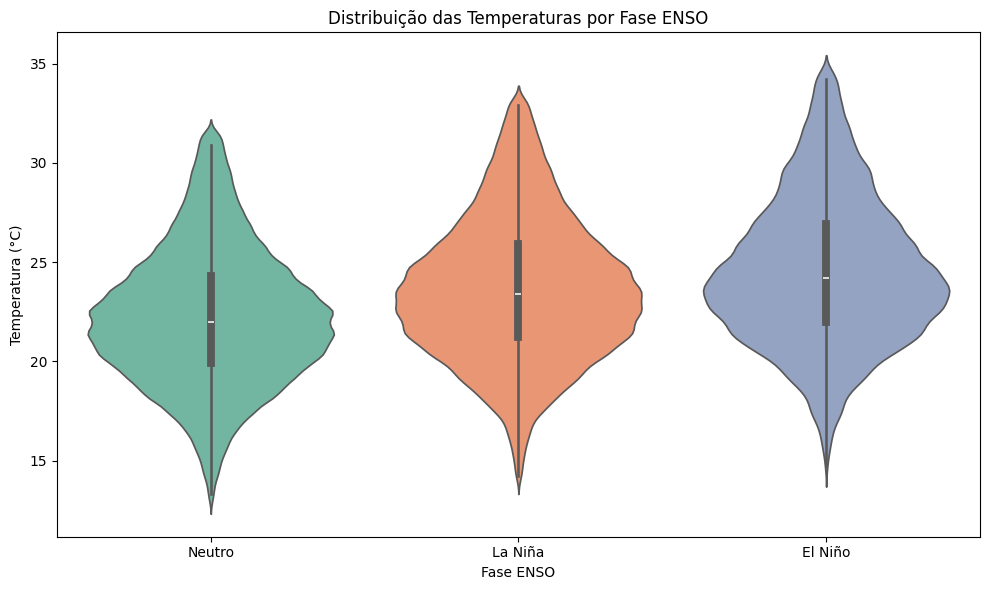

In [795]:
plt.figure(figsize=(10,6))
sns.violinplot(
    x='ENSO_Grupo',
    y='Temperatura',
    data=df_sem_outlier,
    order=['Neutro','La Niña','El Niño'],
    palette='Set2'
)
plt.title('Distribuição das Temperaturas por Fase ENSO')
plt.xlabel('Fase ENSO')
plt.ylabel('Temperatura (°C)')
plt.tight_layout()
plt.show()


#### Analise as médias por estação do ano


In [796]:
medias_estacao = df_sem_outlier.groupby(['Estacao_do_ano','ENSO_Grupo'])['Temperatura'].mean().reset_index()
medias_estacao.pivot(index='Estacao_do_ano', columns='ENSO_Grupo', values='Temperatura')

ENSO_Grupo,El Niño,La Niña,Neutro
Estacao_do_ano,,,
Inverno,22.227209,21.670347,21.055375
Outono,24.044414,22.988425,22.278001
Primavera,24.230213,22.649797,22.865748
Verão,26.289793,25.791703,25.141846


#### Veja se há diferença no número de registros

In [797]:
df_sem_outlier['ENSO_Grupo'].value_counts()

,count,mean,std,min,25%,50%,75%,max
ENSO_Grupo,,,,,,,,
El Niño,119545.0,2015.380459,6.316575,2004.0,2010.0,2016.0,2020.0,2024.0
La Niña,125041.0,2014.583960,4.517471,2009.0,2011.0,2012.0,2018.0,2024.0
Neutro,224689.0,2015.221880,5.526976,2004.0,2012.0,2014.0,2020.0,2024.0


In [798]:
df_sem_outlier.groupby('ENSO_Grupo')['ano'].describe()

,count,mean,std,min,25%,50%,75%,max
ENSO_Grupo,,,,,,,,
El Niño,119545.0,2015.380459,6.316575,2004.0,2010.0,2016.0,2020.0,2024.0
La Niña,125041.0,2014.583960,4.517471,2009.0,2011.0,2012.0,2018.0,2024.0
Neutro,224689.0,2015.221880,5.526976,2004.0,2012.0,2014.0,2020.0,2024.0


#### Os resultados mostram que, embora a literatura climática sugira temperaturas mais baixas durante eventos de La Niña, a análise deste banco de dados para o Rio de Janeiro revela médias intermediárias para La Niña e médias mais baixas para anos Neutros.
#### Isso se explica principalmente porque os eventos de La Niña registrados no período analisado concentram-se nos anos mais recentes (2009–2024), caracterizados por temperaturas globais mais elevadas. Já os anos classificados como Neutros abrangem todo o período (2004–2024), incluindo anos mais antigos, geralmente mais frios.
#### Portanto, além da influência do ENSO, o **período de ocorrência** de cada fenômeno impactou os resultados, refletindo também o efeito do aquecimento global e possíveis variações regionais.


### **Premissa 3:**
#### **Os efeitos dos fenômenos ENSO (El Niño e La Niña) podem influenciar não apenas a temperatura, mas também a frequência de eventos extremos.**
#### **Gráfico: Frequência de ondas de calor e frio por ENSO**

/tmp/ipython-input-799-2400745109.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_calor.index, y=freq_calor.values, palette='Reds', ax=ax[0])
/tmp/ipython-input-799-2400745109.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_frio.index, y=freq_frio.values, palette='Blues', ax=ax[1])


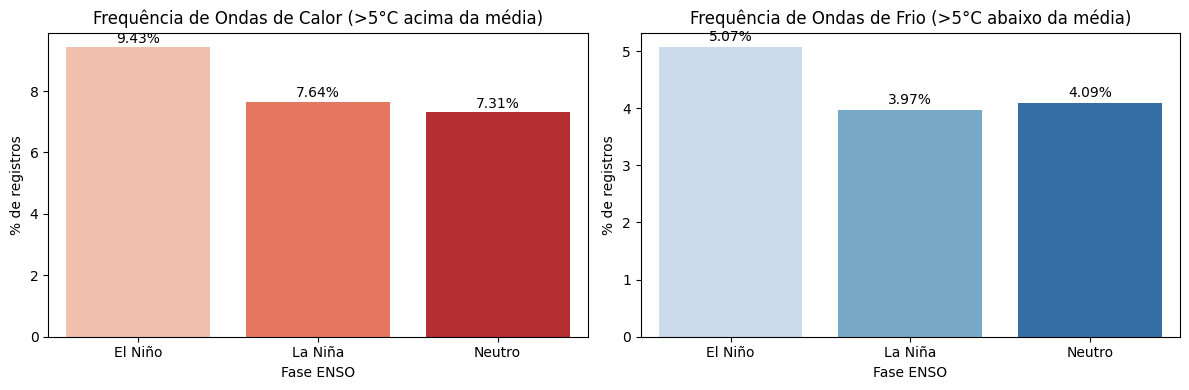

In [799]:
# Calcule a média por estação do ano (ou outra granularidade desejada)
medias_contexto = df_sem_outlier.groupby(['Estacao_do_ano', 'ENSO_Grupo'])['Temperatura'].mean().reset_index()
medias_contexto = medias_contexto.rename(columns={'Temperatura': 'media_temp'})

# Junte essa média de volta ao dataframe original (merge)
df_sem_outlier = df_sem_outlier.merge(medias_contexto, on=['Estacao_do_ano', 'ENSO_Grupo'], how='left')

# Defina as ondas de calor/frio RELATIVAS ao contexto
df_sem_outlier['calor_extremo'] = df_sem_outlier['Temperatura'] >= (df_sem_outlier['media_temp'] + 5)
df_sem_outlier['frio_extremo']  = df_sem_outlier['Temperatura'] <= (df_sem_outlier['media_temp'] - 5)

# Frequências em %
freq_calor = df_sem_outlier.groupby('ENSO_Grupo')['calor_extremo'].mean() * 100
freq_frio  = df_sem_outlier.groupby('ENSO_Grupo')['frio_extremo'].mean() * 100

# Plote os gráficos
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x=freq_calor.index, y=freq_calor.values, palette='Reds', ax=ax[0])
sns.barplot(x=freq_frio.index, y=freq_frio.values, palette='Blues', ax=ax[1])
ax[0].set_title('Frequência de Ondas de Calor (>5°C acima da média)')
ax[1].set_title('Frequência de Ondas de Frio (>5°C abaixo da média)')
ax[0].set_ylabel('% de registros')
ax[1].set_ylabel('% de registros')
ax[0].set_xlabel('Fase ENSO')
ax[1].set_xlabel('Fase ENSO')
for i, v in enumerate(freq_calor.values):
    ax[0].text(i, v + 0.05, f"{v:.2f}%", ha='center', va='bottom')
for i, v in enumerate(freq_frio.values):
    ax[1].text(i, v + 0.05, f"{v:.2f}%", ha='center', va='bottom')
plt.tight_layout()
plt.show()


#### O par de gráficos acima mostra a frequência relativa (%) de **ondas de calor** (temperaturas mais de 5°C acima da média do contexto) e **ondas de frio** (mais de 5°C abaixo da média), para cada fase do ENSO no período analisado.

- #### **Ondas de calor:**  
  São mais frequentes durante eventos de **El Niño** (9,43%), seguidos por La Niña (7,64%) e períodos Neutros (7,31%).  
  Isso indica que o El Niño está associado não só ao aumento da temperatura média, mas também a uma maior ocorrência de extremos de calor.

- #### **Ondas de frio:**  
  São menos frequentes e apresentam uma distribuição relativamente equilibrada entre as fases.  
  Ainda assim, El Niño apresentou a maior frequência de eventos de frio extremo (5,07%), seguido por Neutro (4,09%) e La Niña (3,97%).

#### Esses resultados reforçam que o El Niño aumenta a variabilidade térmica, elevando a ocorrência tanto de ondas de calor quanto, curiosamente, de episódios de frio atípico. La Niña, por outro lado, está associada a uma frequência menor desses extremos.


### **Acumulado de Chuva por Estação do Ano e ENSO**

/tmp/ipython-input-787-166410381.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


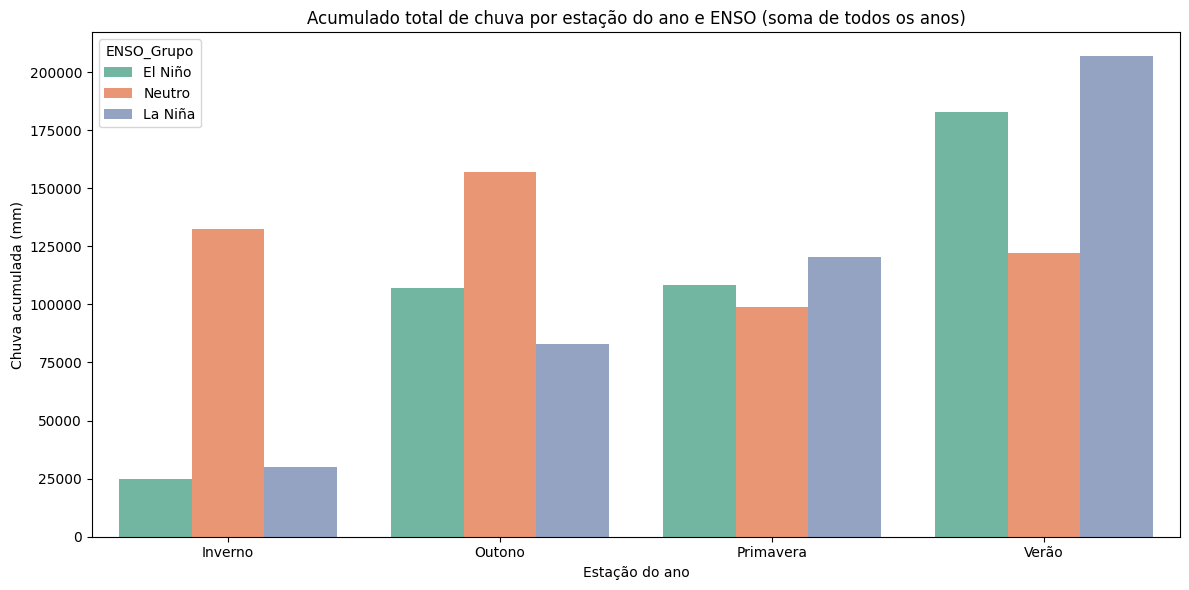

In [787]:
# Agrupa por ano, estação do ano e ENSO, somando o acumulado de chuva de cada estação do ano
chuva_estacao = df_sem_outlier.groupby(['ano', 'Estacao_do_ano', 'ENSO_Grupo'])['24 h'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=chuva_estacao,
    x='Estacao_do_ano',
    y='24 h',
    hue='ENSO_Grupo',
    palette='Set2',
    estimator=sum,
    ci=None
)
plt.title('Acumulado total de chuva por estação do ano e ENSO (soma de todos os anos)')
plt.ylabel('Chuva acumulada (mm)')
plt.xlabel('Estação do ano')
plt.tight_layout()
plt.show()


#### **Análise do Acumulado de Chuva por Estação do Ano e ENSO**

#### O gráfico acima apresenta o **acumulado total de chuva (em milímetros)** em cada estação do ano (Inverno, Outono, Primavera e Verão), **agrupado segundo as fases do ENSO** (El Niño, La Niña e Neutro) ao longo de todo o período analisado (1997–2024).

- ####  **Verão** destaca-se como o período com **maior volume acumulado de chuva**, independentemente da fase do ENSO. O maior acumulado ocorreu durante anos de La Niña, seguido por El Niño e, por último, períodos Neutros.
- #### **Primavera** mostra volumes intermediários de chuva, com ligeira predominância de La Niña sobre El Niño e Neutro.
- #### **Outono e Inverno** apresentam, em geral, volumes acumulados de chuva bem menores em comparação ao verão, com destaque para o outono em períodos Neutros e para o inverno também em anos Neutros.
- #### A distribuição evidencia uma **sazonalidade clara**: as maiores chuvas concentram-se no verão, enquanto os menores acumulados se distribuem entre outono e inverno.

#### Além disso, o gráfico permite comparar rapidamente o impacto do ENSO em cada estação:
- #### Durante **La Niña**, o verão foi marcado por acumulados de chuva notavelmente mais altos, indicando maior frequência ou intensidade de eventos extremos de precipitação nesse período.
- #### Nos períodos **Neutros**, há uma distribuição mais homogênea, sem picos tão destacados quanto em La Niña ou El Niño.
- #### Os anos de **El Niño** também apresentam altos volumes no verão, porém inferiores aos de La Niña, e volumes expressivos na primavera.

#### **Em resumo:**  
#### O gráfico demonstra que o regime de chuvas no Rio de Janeiro é fortemente sazonal, com **verões muito mais chuvosos** do que as outras estações. A influência do ENSO é perceptível, com **La Niña associada a verões particularmente úmidos** e os períodos Neutros tendendo a menores extremos.


### **Heatmap: Temperatura média por mês x ENSO**

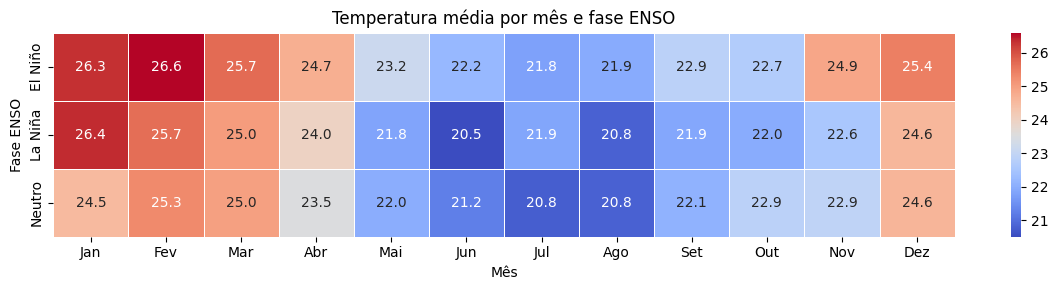

In [800]:
# Extrai o mês em número e nome abreviado
df_sem_outlier['mes_num'] = pd.to_datetime(df_sem_outlier['Data']).dt.month
df_sem_outlier['mes_nome'] = pd.to_datetime(df_sem_outlier['Data']).dt.strftime('%b')

# Agrupa a temperatura média por fase ENSO e mês
pivot = (
    df_sem_outlier.groupby(['ENSO_Grupo', 'mes_num', 'mes_nome'])['Temperatura']
    .mean()
    .reset_index()
    .pivot(index='ENSO_Grupo', columns='mes_num', values='Temperatura')
)

# Reordena as colunas dos meses
pivot = pivot[[1,2,3,4,5,6,7,8,9,10,11,12]]
meses_abv = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
pivot.columns = meses_abv

plt.figure(figsize=(12,3))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)
plt.title("Temperatura média por mês e fase ENSO")
plt.xlabel("Mês")
plt.ylabel("Fase ENSO")
plt.tight_layout()
plt.show()

#### O heatmap acima apresenta a **temperatura média mensal** no Rio de Janeiro para cada fase do ENSO, ao longo do período de 1997 a 2024.

- #### As **cores mais quentes** indicam meses com médias de temperatura mais elevadas, enquanto as cores frias indicam meses mais frios.
- #### Observa-se claramente o **ciclo sazonal** típico: temperaturas mais altas no verão (dezembro a março) e mais baixas no inverno (junho a agosto) em todas as fases do ENSO.
- #### Os meses de verão durante eventos de **El Niño** e **La Niña** apresentam as **maiores médias de temperatura** — destaque para janeiro e fevereiro de El Niño, que atingem valores superiores a 26°C.
- #### Nos meses de inverno, as diferenças entre as fases do ENSO são mais sutis, mas ainda assim, El Niño costuma apresentar médias levemente superiores, seguido por La Niña e Neutro.
- #### Vale notar que, mesmo em La Niña, as médias mensais foram mais altas do que nos anos Neutros, especialmente nos meses mais quentes, refletindo a influência do período de ocorrência desse fenômeno (anos mais recentes e mais quentes globalmente).

#### Este gráfico permite visualizar rapidamente como o **ENSO potencializa extremos sazonais de temperatura** e ressalta a importância do contexto temporal e climático ao interpretar médias históricas.


### **Tendência anual de temperatura média por ENSO**

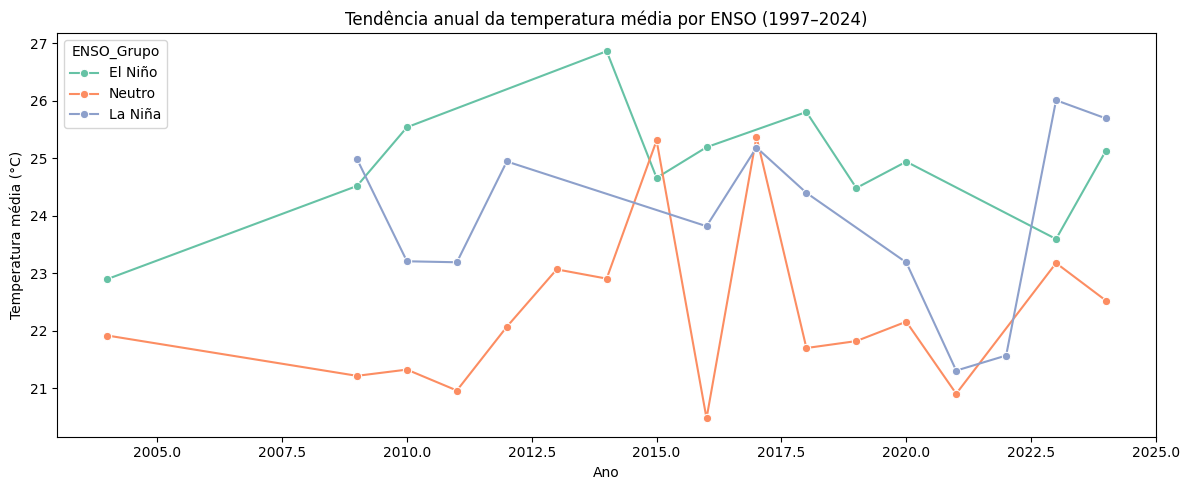

In [801]:
# Agrupa temperatura média por ano e ENSO_Grupo
df_sem_outlier['ano'] = pd.to_datetime(df_sem_outlier['Data']).dt.year
media_ano_enso = (
    df_sem_outlier
    .groupby(['ano', 'ENSO_Grupo'])['Temperatura']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,5))
sns.lineplot(
    data=media_ano_enso,
    x='ano',
    y='Temperatura',
    hue='ENSO_Grupo',
    marker='o',
    palette='Set2'
)
plt.title('Tendência anual da temperatura média por ENSO (1997–2024)')
plt.xlabel('Ano')
plt.ylabel('Temperatura média (°C)')
plt.tight_layout()
plt.show()


#### O gráfico acima mostra a **tendência da temperatura média anual** no Rio de Janeiro, segmentada por fase do ENSO (El Niño, La Niña e Neutro), entre 2004 e 2024.

- #### **Linhas separadas** representam a temperatura média em cada ano, de acordo com a fase predominante do ENSO naquele período.
- #### Observa-se que, de forma geral, os anos de **El Niño** registraram médias de temperatura mais elevadas do que anos Neutros e de La Niña, especialmente na segunda metade do período analisado.
- #### Os anos de **La Niña** aparecem concentrados nos anos mais recentes, acompanhando a tendência global de aquecimento – isso explica por que, neste recorte, La Niña apresenta médias intermediárias ou até superiores aos anos Neutros.
- #### Períodos **Neutros** apresentam maior variação interanual e, em vários momentos, médias inferiores às demais fases.
- #### O gráfico evidencia também a **tendência geral de elevação das temperaturas ao longo das décadas**, reforçando o impacto do aquecimento global e a importância de considerar o contexto temporal na análise de fenômenos climáticos.

#### Em síntese, o gráfico destaca a forte relação entre o ENSO e a variabilidade térmica anual, ao mesmo tempo em que mostra que a evolução do clima urbano e o aquecimento global têm papel decisivo nas médias observadas.


# Conclusão

### O presente MVP analisou a influência dos fenômenos ENSO (El Niño, La Niña e períodos Neutros) sobre o clima do Rio de Janeiro entre 1997 e 2024, com foco em temperatura e precipitação. A abordagem contemplou desde a limpeza e padronização do dataset, a análise descritiva dos dados, até a exploração das hipóteses formuladas para o projeto.

### Os resultados demonstraram que:
- #### **Eventos de El Niño** estiveram associados às **maiores médias de temperatura** e à maior frequência de ondas de calor (temperaturas muito acima da média), confirmando as premissas climáticas globais.
- #### **La Niña**, ao contrário do que é descrito na literatura, não apresentou as menores médias, mas sim valores intermediários, provavelmente devido ao fato de ocorrer apenas em anos mais recentes — período de aquecimento global mais acentuado.
- #### **Períodos Neutros** apresentaram as menores médias de temperatura no recorte analisado, evidenciando a importância de considerar o contexto temporal na avaliação dos impactos do ENSO.
- #### A análise da precipitação revelou que os **maiores acumulados de chuva** concentram-se no verão, sendo a influência do ENSO mais perceptível em determinados extremos, mas sem uma tendência absolutamente predominante.
- #### Tanto extremos de calor quanto de frio estiveram mais presentes nos anos de El Niño, indicando que além de elevar a média, esse fenômeno pode aumentar a variabilidade térmica.

### Limitações e próximos passos

#### É importante ressaltar que a série histórica e o número de registros para cada fase do ENSO não são uniformes ao longo dos anos, o que pode influenciar as médias. Mudanças na urbanização, microclimas locais e eventuais falhas ou mudanças em estações meteorológicas também podem afetar os resultados.

#### Como próximos passos, recomenda-se:
- #### Explorar métodos estatísticos mais robustos (ex: testes de hipótese, regressão);
- #### Avaliar outros indicadores climáticos (vento, pressão, etc.);
- #### Ampliar a análise para outros municípios do Rio de Janeiro ou comparar com outras capitais;
- #### Investigar mais detalhadamente o impacto do recorte temporal dos fenômenos ENSO.

**Em síntese:** O trabalho valida parcialmente as premissas e evidencia o papel do ENSO no clima do Rio, mas mostra também que outros fatores (tempo, contexto urbano, tendências globais) são essenciais para a compreensão completa dos extremos climáticos.
